# Youtube Video Views Prediction

### Import Libraries and Settings

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = 100
# pd.set_option('display.max_colwidth', None) #This one is used only to see the text features
# pd.set_option('display.float_format', '{:.15f}'.format)

# Requirements
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.0
seaborn version :  0.13.2


#### Load Dataset (Jupyter Notebook)

In [2]:
# pip install openpyxl

In [3]:
df = pd.read_excel('youtube_statistics.xlsx')

#### Load Dataset (Google Colab)

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# df = pd.read_excel('/content/drive/MyDrive/Google Drive/youtube_statistics.xlsx')

# Initial Data Understanding and Pre-Processing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

Features Description :

- **trending_date:** Date when the video is trending.
- **title:** Video title.
- **channel_title:** Channel name.
- **category_id:** Video category in label encoding.
- **publish_time:** Video publishing time.
- **tags:** Tags used in the video.
- **views:** Number of video views.
- **likes:** Number of video likes.
- **dislikes:** Number of video dislikes.
- **comment_count:** Number of comments on the video.
- **comments_disabled:** Indicates whether comments are disabled for the video.
- **ratings_disabled:** Indicates whether ratings are disabled for the video.
- **video_error_or_removed:** Indicates whether the video is currently in error or has been removed.
- **description:** Video description.
- **No_tags:** Number of tags used.
- **desc_len:** Length of the video description in terms of words.
- **len_title:** Length of the video title in terms of words.
- **publish_date:** Date when the video was published.

In [7]:
df.sample(10)

trending_date                                              title  \
17794    2018-02-21  ಮದುವೆಯಾದ ಗೊಂಬೆ ನೇಹಾ ಆಕ್ಟಿಂಗ್ ಗೆ ಗುಡ್ ಬೈ ಗಂಡ ಮಾ...   
8504     2017-12-29  சந்திரலேகா | CHANDRALEKHA | Sun TV | Tamil Ser...   
13676    2018-01-28   SHRIMAD BHAGWAT KATHA  || Day -1 || BENGALURU ||   
25971    2018-04-16  Sudigaali Sudheer Performance | Extra Jabardas...   
5478     2017-12-13  Shrimad Bhagwat Katha || Day - 6 || MUMBAI || ...   
30008    2018-05-08  अगले 24 घंटे में आ सकता है आंधी तूफान- मौसम विभाग   
33643    2018-05-28  Muddha Mandaram | Episode - 1095 | Preview | 2...   
28982    2018-05-02              Main, Meri Girlfriend Or Papa / ep 02   
21785    2018-03-17       Ugadi special song 2018 by Madhu Priya - TV1   
34114    2018-05-30  Telangana Formation Day special song 2018 || M...   

                    channel_title  category_id publish_time  \
17794                chandanavana           24     04:38:35   
8504             Saregama TVShows           24     09:00:11   
13676  Shri Devkinandan Thakur Ji           22     15:12:28   
25971              ETV Jabardasth           22     18:49:53   
5478   Shri Devkinandan Thakur Ji           22     14:42:22   
30008                    inKhabar           25     05:20:11   
33643                 zeetvtelugu           24     23:23:18   
28982                Irahul Vohra           23     08:14:38   
21785                  TV1 Telugu           25     17:35:51   
34114                  TV1 Telugu           25     07:11:38   

                                                    tags    views  likes  \
17794  gombe neha gowda|"neha gowda marriage"|"neha"|...   108011    303   
8504   Chandralekha TV Serial|"Tamil TV Serials"|"Sun...   185030   1053   
13676                                             [none]    26381   3054   
25971  etv shows|"eenadu television"|"padutha theeyag...  1626723   9406   
5478   thakur ji bhajan|"katha"|"shri devkinandan tha...    63428   4540   
30008  उत्‍तर प्रदेश|"बिहार"|"पश्चिम बंगाल"|"ओडिशा मे...   297343   1453   
33643  zee telugu|"Muddha Mandaram"|"full episode"|"t...   159485    261   
28982  irahul vohra|"irahul vohra vines"|"funny vines...    76364   5789   
21785  Tv9|"Tv9 exclusive"|"Tv9 Telugu"|"Breaking new...  1734728  13104   
34114  Telangana Formation Day special song 2018 || M...   775907   5420   

       dislikes  comment_count  comments_disabled  ratings_disabled  \
17794        47             42              False             False   
8504        175             70              False             False   
13676        73            148              False             False   
25971       860            693              False             False   
5478        198            177              False             False   
30008       218            226              False             False   
33643        42             11              False             False   
28982       127            614              False             False   
21785      1650           1004              False             False   
34114      1075            532              False             False   

       video_error_or_removed  \
17794                   False   
8504                    False   
13676                   False   
25971                   False   
5478                    False   
30008                   False   
33643                   False   
28982                   False   
21785                   False   
34114                   False   

                                             description  No_tags  desc_len  \
17794               What Gombe Neha Gowda Husband Doing.       11        36   
8504   CHANDRALEKHA - WATCH TODAY EPISODE ::\n\nபெற்ற...       27       875   
13676  SHRIMAD BHAGWAT KATHA  || Day -1 || BENGALURU ...        1       846   
25971  A comedy show, in which comedians like Sudigaa...       35       587   
5478   Shrimad Bhagwat Katha || Day -6 || MUMBAI || 6...       10       830   
30008  बुधवार को आधे हिंदुस्तान में आए त

Just from these information, there are some useful insight to this data that understanding it could make it easier for further analysis and feature transformation, they are :

- trending_date feature have the wrong format should be in datetime instead of object, the publish_date already got the correct dtype. Regarding the publish_time, I personally think it would be useful to have more information, such as the number of views tracked over time, so that we can observe the movement of views at each point in time (time-series analysis). Currently, we can only see the start point (publish_date) and end point (trending_date)
- Video category (category_id) is displayed as a labelled number already, so we are quite unsure what the details of each video like which one is Gaming, Music Videos, News and Politics, etc
- title, tags, and description are quite interesting to play around in text mining though it will be quite challenging in separating the english and indian texts
- As for boolean feature like comments_disabled, ratings_disabled, video_error_or_removed potentially could be encoded by one-hot enxoding since they are nominal values
- channel_title most likely if we want to use it, will be done through frequency/count encoding
- Feature views is the target variable, we could move it to the last order in dataframe (personal preference)

In [8]:
# Re-arrange the columns (views in last)
df_1 = df.drop(columns='views')
df_2 = df['views']
df = pd.concat([df_1, df_2], axis='columns')

In [9]:
#Checking missing values
df.isna().sum()

trending_date              0
title                      0
channel_title              0
category_id                0
publish_time               0
tags                       0
likes                      0
dislikes                   0
comment_count              0
comments_disabled          0
ratings_disabled           0
video_error_or_removed     0
description               45
No_tags                    0
desc_len                   0
len_title                  0
publish_date               0
views                      0
dtype: int64

In [10]:
#Drop missing values
df = df.drop_duplicates()

In [11]:
#Checking amount of duplicated values
df.duplicated().sum()

0

# Descriptive Statistics

In [12]:
#Grouping columns based on their types
nums = ['likes', 'dislikes', 'comment_count', 'No_tags', 'desc_len', 'len_title', 'category_id', 'views']
cats = ['title', 'channel_title', 'tags','description']
date = ['trending_date', 'publish_date','publish_time']
bool = ['comments_disabled', 'ratings_disabled', 'video_error_or_removed']

print("Numeric Columns:")
print(list(nums))

print("\nCategorical Columns:")
print(list(cats))

print("\nDate/Time Columns:")
print(list(date))

print("\nBoolean Columns:")
print(list(bool))

Numeric Columns:
['likes', 'dislikes', 'comment_count', 'No_tags', 'desc_len', 'len_title', 'category_id', 'views']

Categorical Columns:
['title', 'channel_title', 'tags', 'description']

Date/Time Columns:
['trending_date', 'publish_date', 'publish_time']

Boolean Columns:
['comments_disabled', 'ratings_disabled', 'video_error_or_removed']


In [13]:
#Describe numerical columns
df[nums].describe().transpose()

count          mean           std     min        25%  \
likes          32562.0  2.595444e+04  9.720113e+04     0.0     800.00   
dislikes       32562.0  1.596781e+03  1.703103e+04     0.0      99.00   
comment_count  32562.0  2.561673e+03  1.488591e+04     0.0      74.00   
No_tags        32562.0  1.884906e+01  9.863164e+00     1.0      12.00   
desc_len       32562.0  9.132707e+02  8.070886e+02     3.0     366.00   
len_title      32562.0  7.099567e+01  2.228042e+01     5.0      54.00   
category_id    32562.0  2.160242e+01  6.525405e+00     1.0      23.00   
views          32562.0  1.007091e+06  3.171556e+06  4024.0  114162.25   

                    50%       75%          max  
likes            2817.0   12299.0    2912710.0  
dislikes          293.0     943.0    1545017.0  
comment_count     306.0    1188.0     827755.0  
No_tags            19.0      25.0         72.0  
desc_len          673.0    1226.0       5136.0  
len_title          75.0      91.0        100.0  
category_id        24.0      24.0         43.0  
views          277788.0  738924.5  125432237.0

In [14]:
#Describe categorical columns
df[cats].describe().transpose()

count unique  \
title          32562  16431   
channel_title  32562   1390   
tags           32562  12463   
description    32518  13979   

                                                             top  freq  
title                           Nandhini | Today @ 9 pm | Sun TV    15  
channel_title                                          VikatanTV   208  
tags                                                      [none]  1027  
description    Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...   150

In [15]:
#Describe boolean columns
df[bool].describe().transpose()

count unique    top   freq
comments_disabled       32562      2  False  31478
ratings_disabled        32562      2  False  31873
video_error_or_removed  32562      2  False  32553

In [16]:
#Describe date columns
df[date].describe().transpose()

count                           mean                  min  \
publish_date  32562  2018-02-16 23:35:27.363183872  2017-05-27 00:00:00   

                              25%                  50%                  75%  \
publish_date  2017-12-25 00:00:00  2018-02-12 00:00:00  2018-04-12 00:00:00   

                              max  
publish_date  2018-06-13 00:00:00

# Univariate Analysis

## Numerical Columns

In [17]:
#Check number of subplots that will be make
len(df[nums].columns)

8

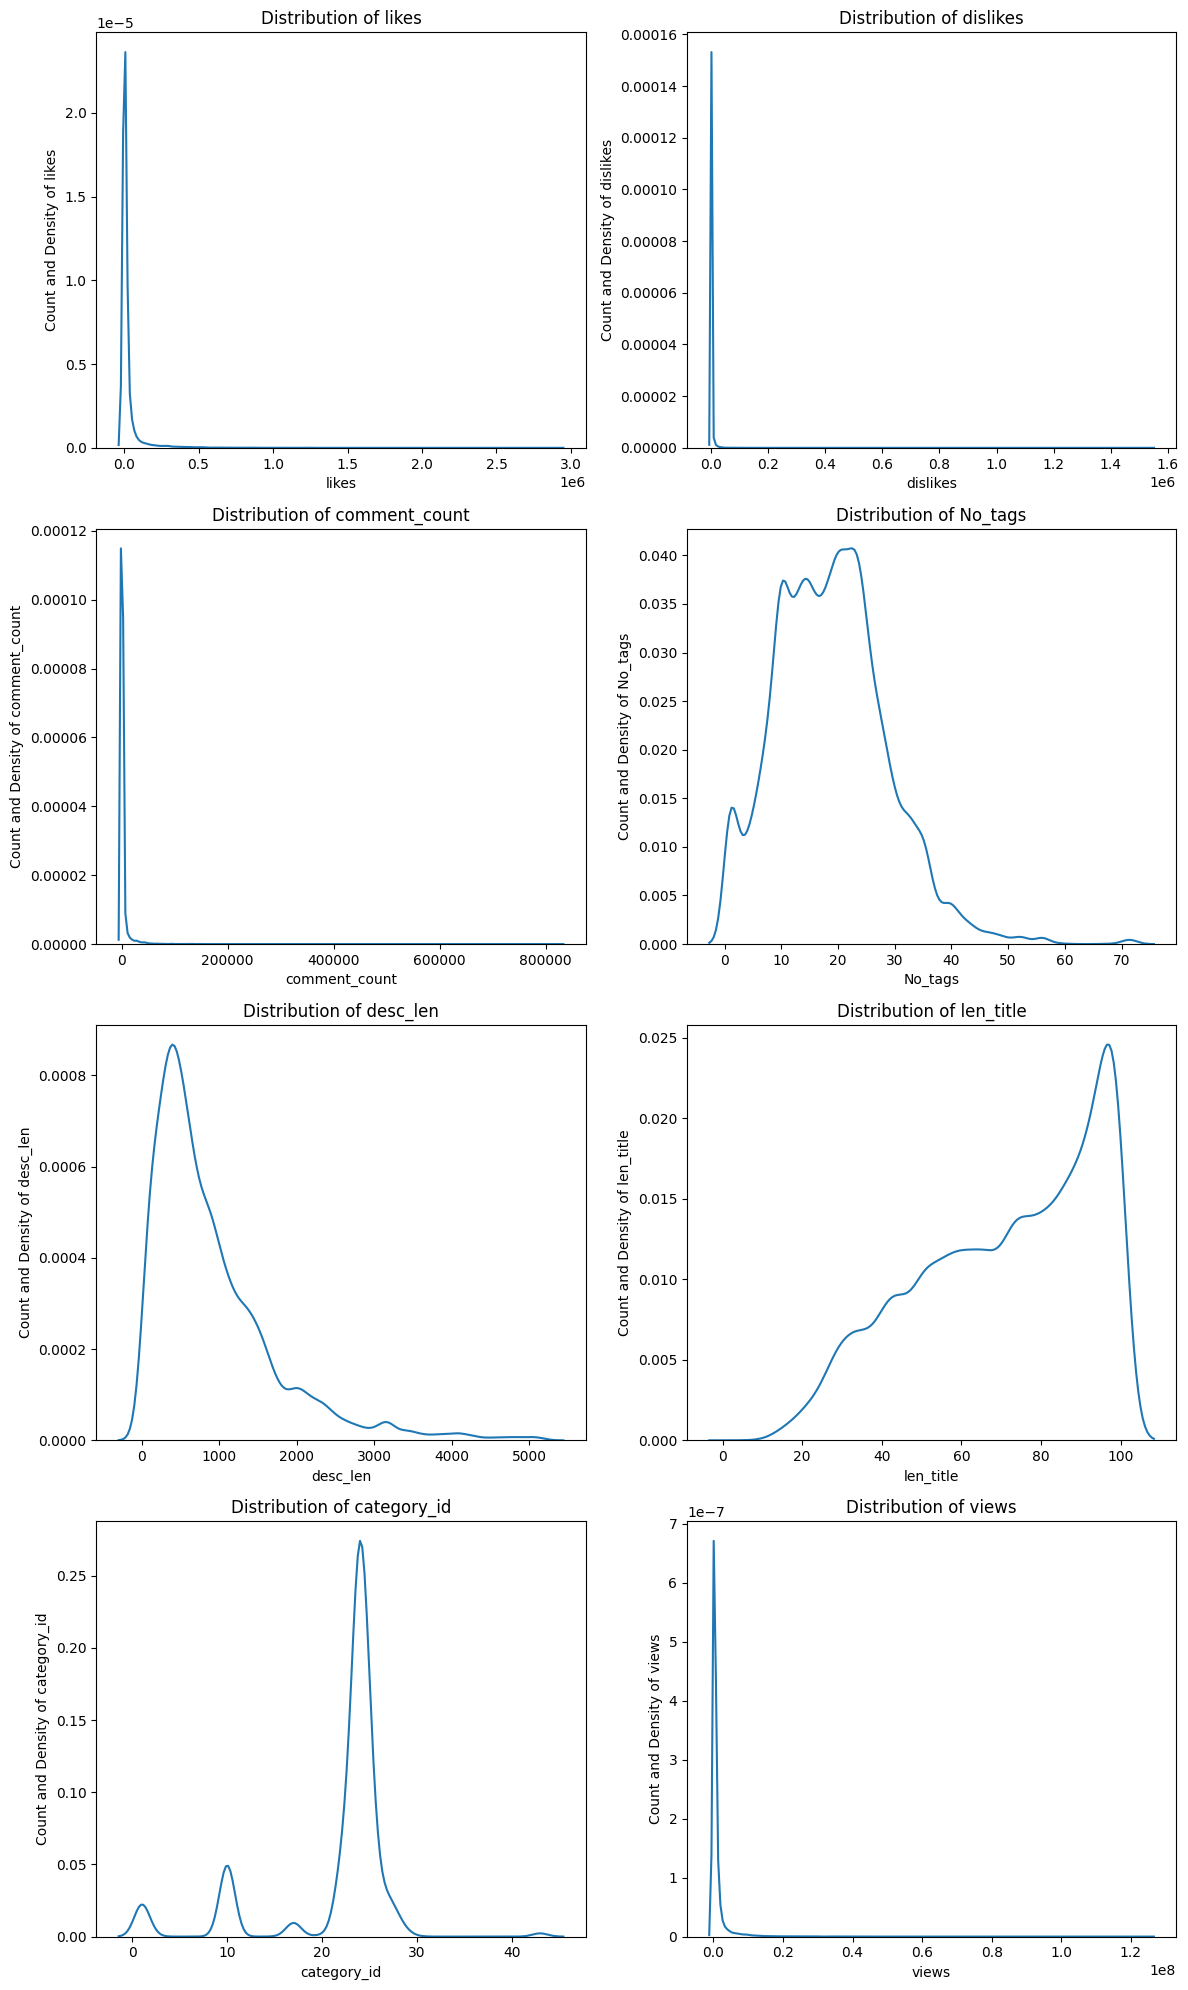

In [18]:
# Kdeplot

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12,20))
axes = axes.flatten()

for i in range(len(nums)) :
    sns.kdeplot(ax=axes[i], x=df[nums[i]])
    axes[i].set_title(f'Distribution of {nums[i]}')
    axes[i].set_ylabel(f'Count and Density of {nums[i]}')
    axes[i].set_xlabel(f'{nums[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(nums) < len(axes) :
    axes[len(nums)].remove()

plt.tight_layout()

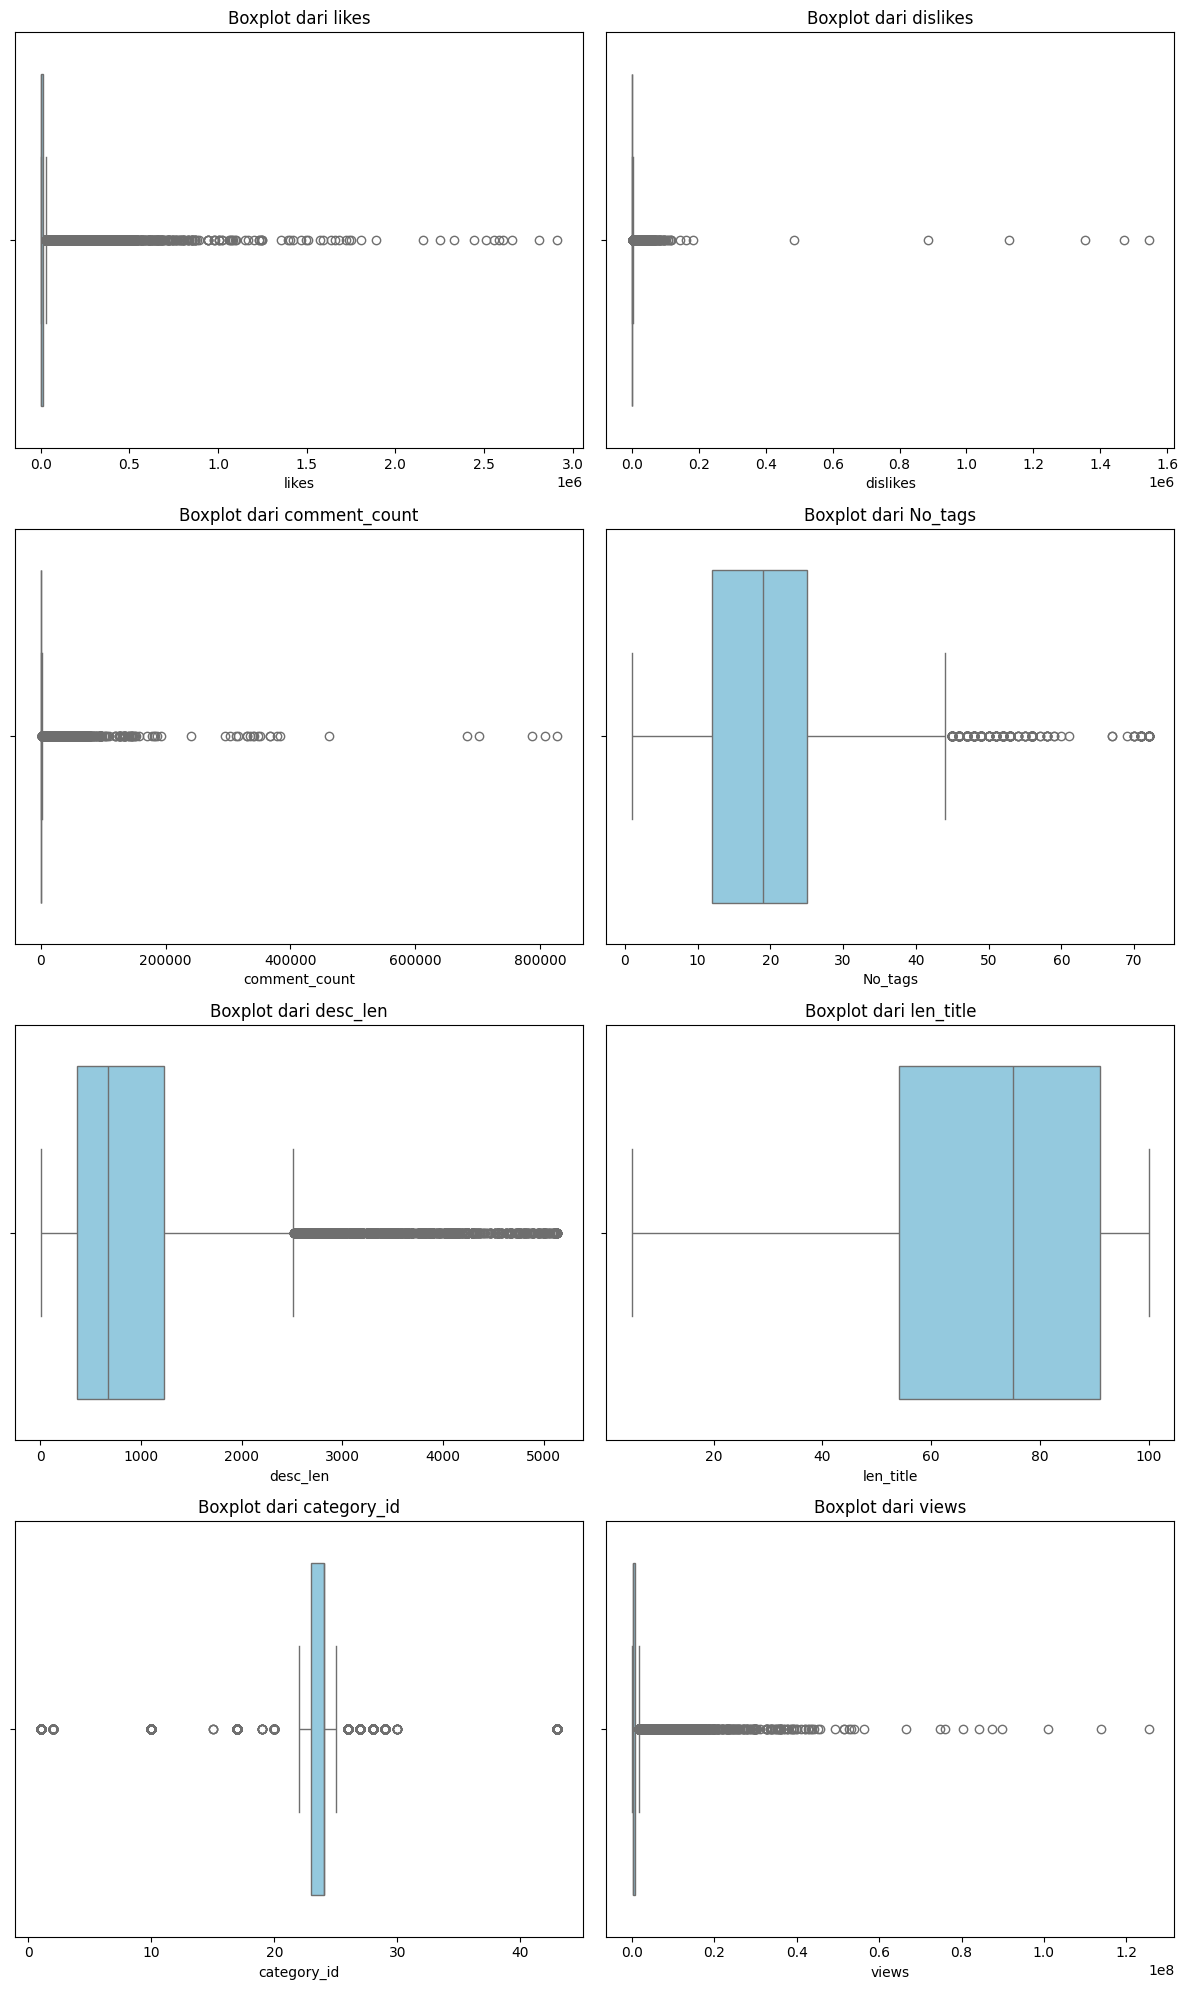

In [19]:
# Boxplot
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 20))
axes = axes.flatten()

for i in range(len(nums)) :
  sns.boxplot(ax=axes[i], x=df[nums[i]], orient='h', color='skyblue')
  axes[i].set_title(f'Boxplot of {nums[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(nums) < len(axes) :
    axes[len(nums)].remove()

plt.tight_layout()

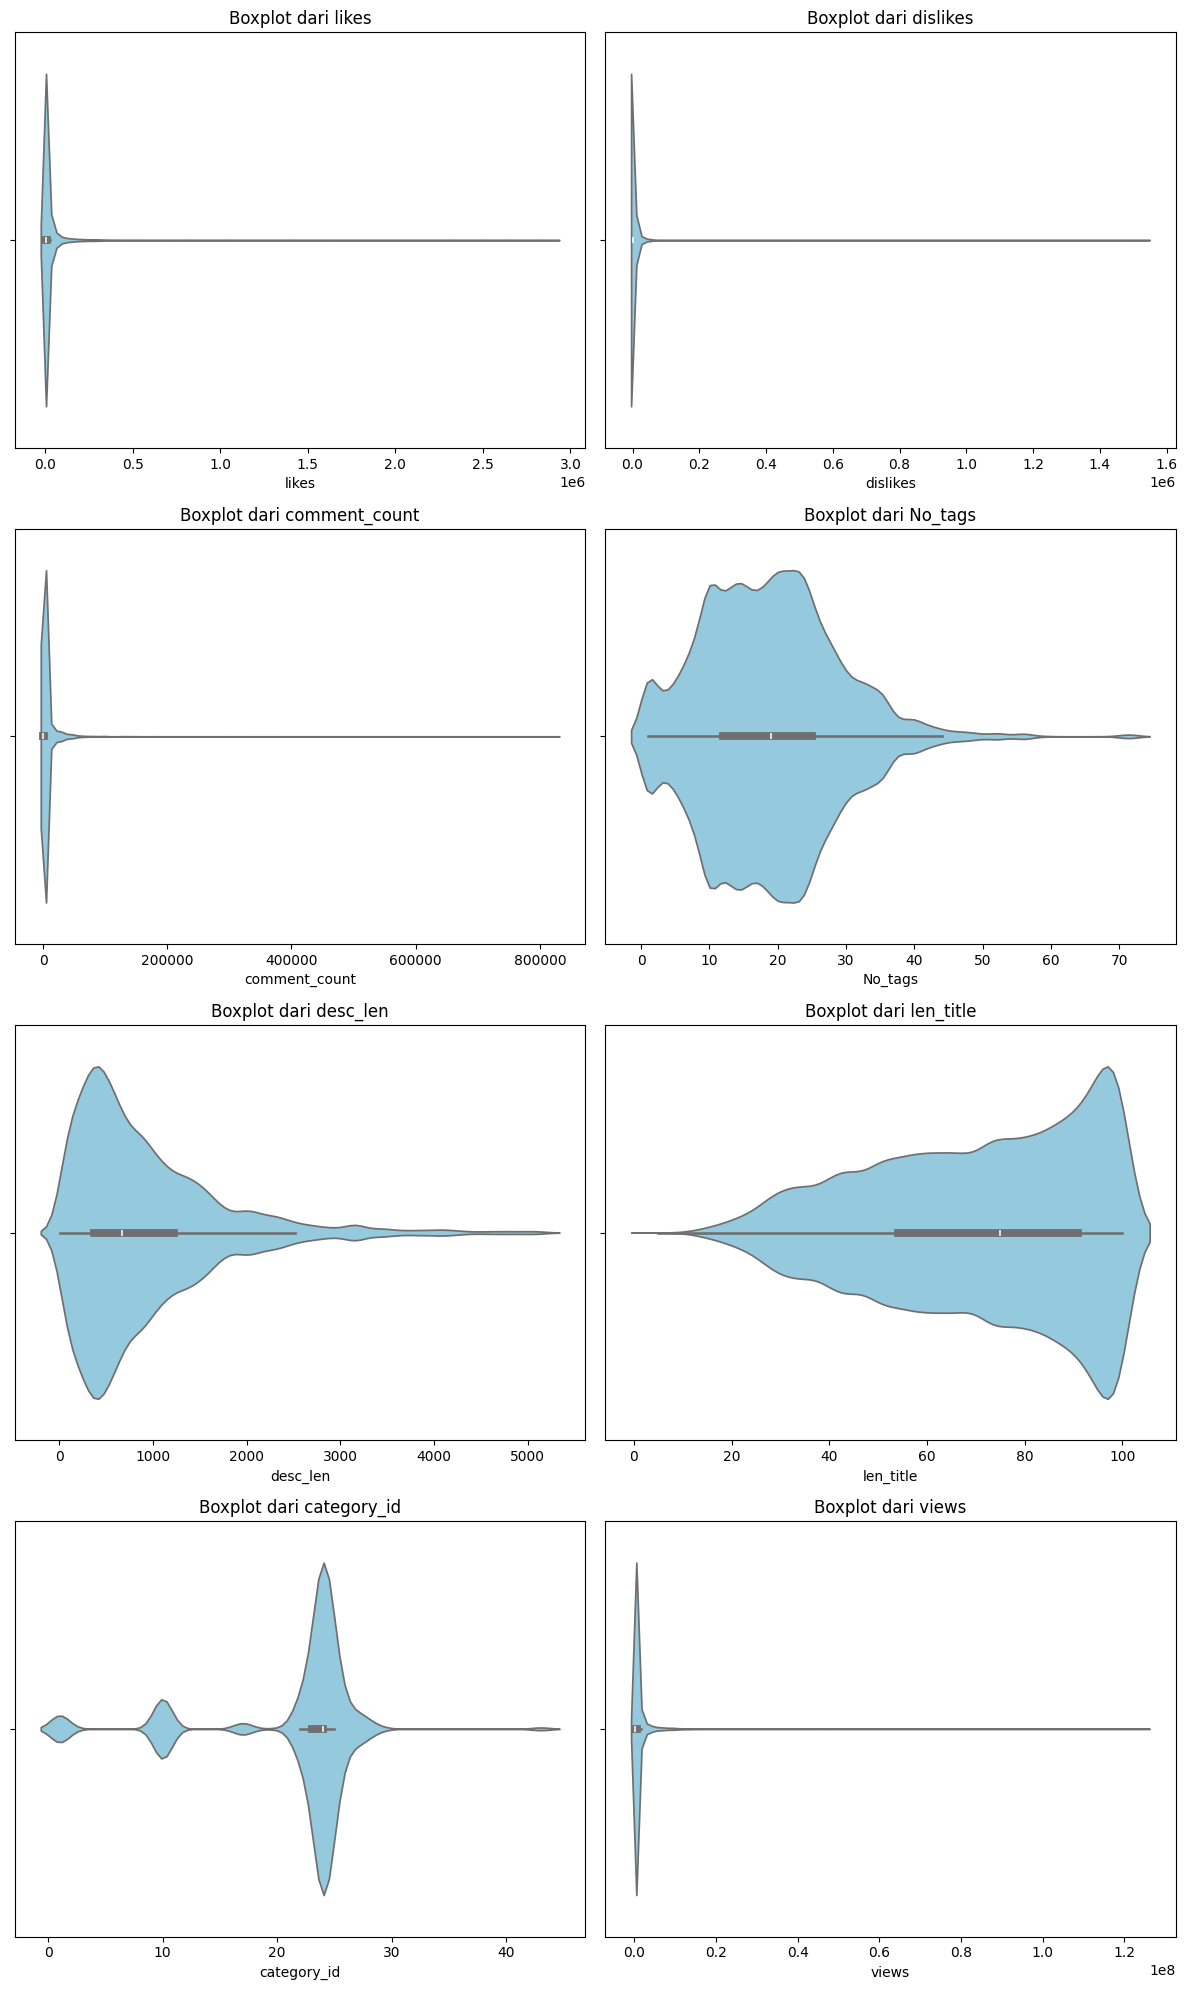

In [20]:
# Violinplot
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 20))
axes = axes.flatten()

for i in range(len(nums)) :
  sns.violinplot(ax=axes[i], x=df[nums[i]], orient='h', color='skyblue')
  axes[i].set_title(f'Boxplot of {nums[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(nums) < len(axes) :
    axes[len(nums)].remove()

plt.tight_layout()

## Categorical and Boolean Columns

In [21]:
df[cats]

title       channel_title  \
0      Sharry Mann: Cute Munda ( Song Teaser) | Parmi...     Lokdhun Punjabi   
1      पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...             HJ NEWS   
2      Stylish Star Allu Arjun @ ChaySam Wedding Rece...                TFPC   
3                         Eruma Saani | Tamil vs English         Eruma Saani   
4      why Samantha became EMOTIONAL @ Samantha naga ...          Filmylooks   
...                                                  ...                 ...   
36739  Engineering Girls | Web Series | S01E02 - Ghar...      The Timeliners   
36740  Rusev vs. Samoa Joe - with Special Guest Refer...                 WWE   
36741  Dhadak | Official Trailer | Janhvi & Ishaan | ...  Dharma Productions   
36758                   What If PubG Was Made In India ?         Angry Prash   
36769  Funny Ramzan Scenes Part - 2 | Hyderabadi Come...    Warangal Diaries   

                                                    tags  \
0      sharry mann|"sharry mann new song"|"sharry man...   
1      पीरियड्स के समय|"पेट पर पति करता ऐसा"|"देखकर द...   
2      Stylish Star Allu Arjun @ ChaySam Wedding Rece...   
3      Eruma Saani|"Tamil Comedy Videos"|"Films"|"Mov...   
4      Filmylooks|"latest news"|"telugu movies"|"telu...   
...                                                  ...   
36739  funny videos|"hotels"|"comedy"|"comedy video"|...   
36740  wwe|"world wrestling entertainment"|"wrestling...   
36741  Dharma|"Dharma Productions"|"Dhadak"|"Janhvi K...   
36758  pubg|"PlayerUnknown's Battlegrounds"|"pubg mob...   
36769  warangal diaries|"latest"|"funny"|"comedy"|"Ba...   

                                             description  
0      Presenting Sharry Mann latest Punjabi Song  Cu...  
1      पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...  
2      Watch Stylish Star Allu Arjun @ ChaySam Weddin...  
3      This video showcases the difference between pe...  
4      why Samantha became EMOTIONAL @ Samantha naga ...  
...                                                  ...  
36739  Maggu is preparing for Sharda University inter...  
36740  The Miz serves as special guest referee in thi...  
36741  When two worlds collide, they become oneDhadak...  
36758  This funny video is about what if players unkn...  
36769  (Earphone Use Is Recommended)!!Funny Ramzan Sc...  

[32562 rows x 4 columns]

In [22]:
#Categorical Feature Counts
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom title:
title
Nandhini | Today @ 9 pm | Sun TV                                                                        15
Mission: Impossible - Fallout (2018) - Official Trailer - Paramount Pictures                            14
Sanju | Official Teaser | Ranbir Kapoor | Rajkumar Hirani                                               13
Kasthooriman || General Promo || Mon to Sat at 8:30 PM || Asianet                                       12
School Ke Wo Din - Amit Bhadana                                                                         11
                                                                                                        ..
ജീവനെടുത്ത ഓട്ടോ ഡ്രൈവറുടെ ആത്മഹത്യ കുറിപ്പ് പുറത്ത്|new|asianet|news|malayalam|today|latest|exclusi     1
Budget 2018: देखिए क्या हुआ सस्ता और क्या महंगा | Headlines India                                        1
Fire in Madurai Meenakshi Amman Temple Complex, Many Shops Gutted | Thanthi TV                           1
Hey Ju

Those features have too many unique values for direct plotting or one-hot encoding. Specific grouping through feature engineering and extraction is needed beforehand if you intend to use them

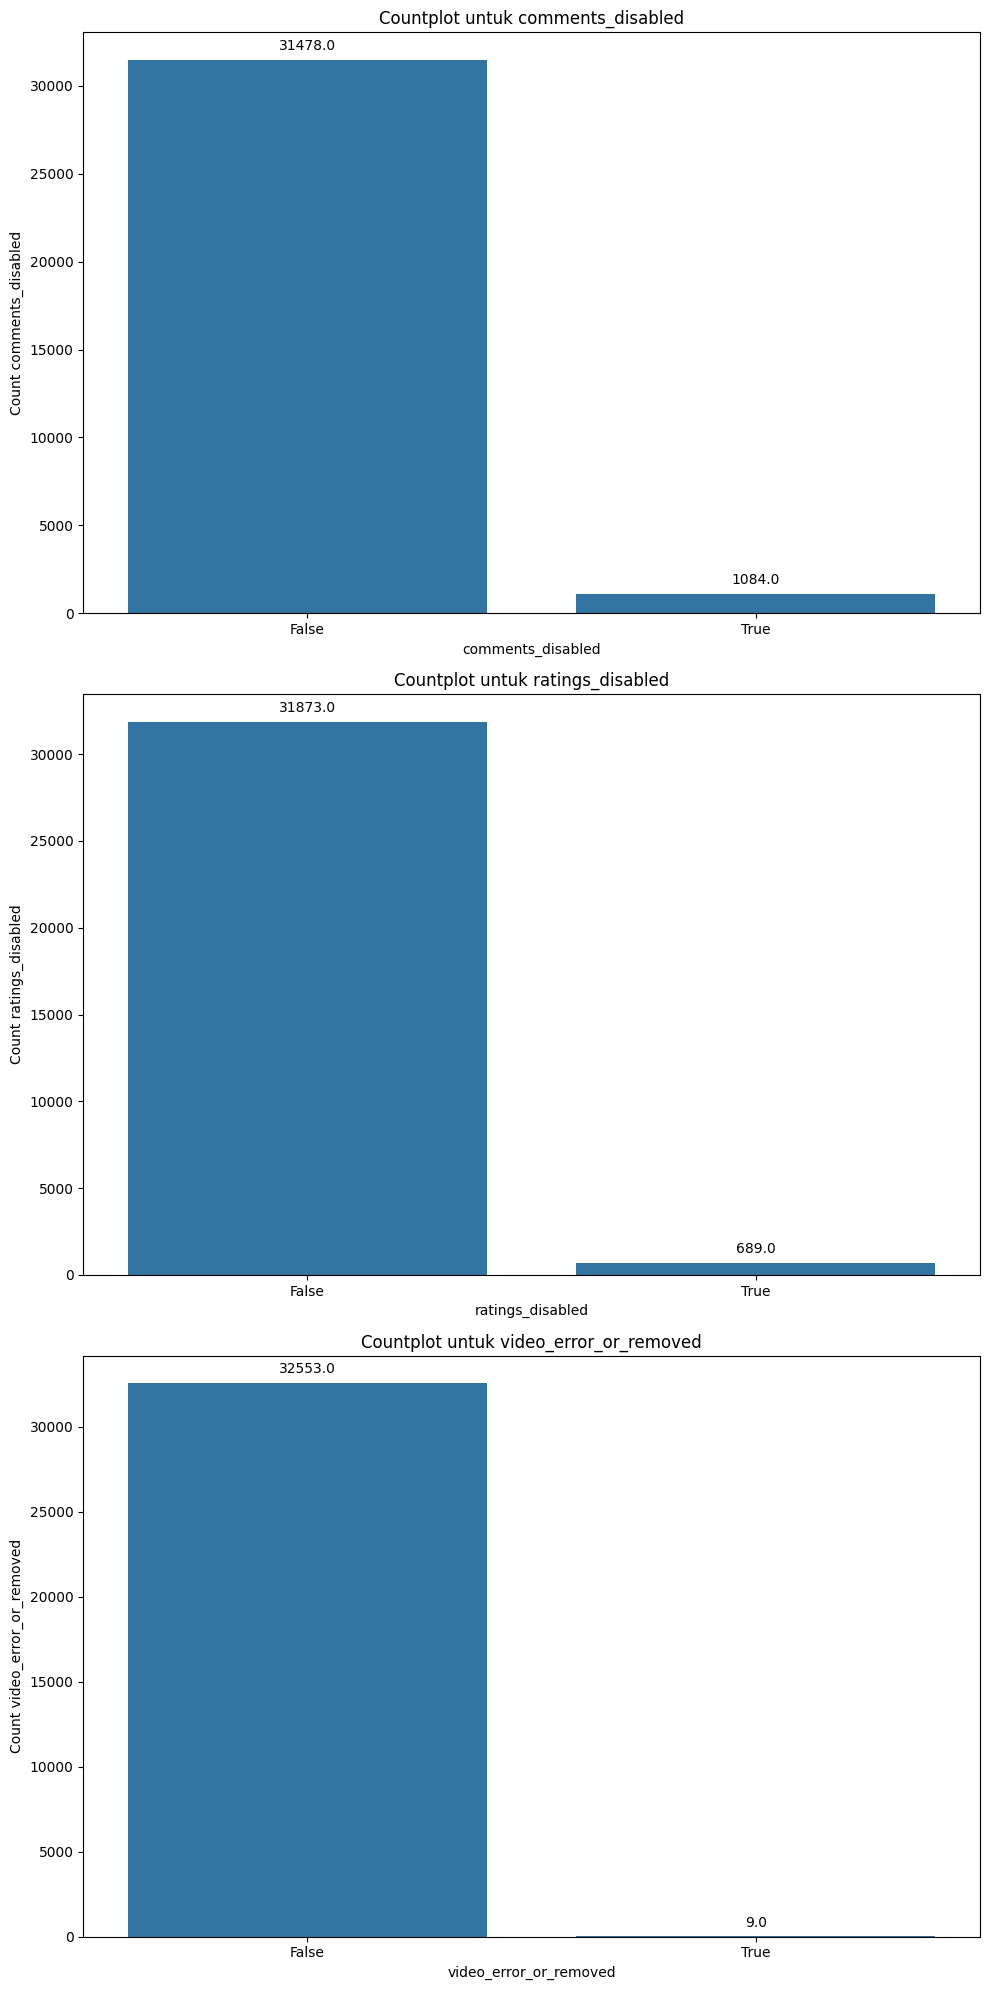

In [23]:
#Boolean features understanding
bool = ['comments_disabled', 'ratings_disabled', 'video_error_or_removed']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))

for i in range(len(bool)):
    ax = sns.countplot(ax=axes[i], x=df[bool[i]])
    axes[i].set_title(f'Countplot for {bool[i]}')
    axes[i].set_ylabel(f'Count {bool[i]}')
    axes[i].tick_params(axis='x')

    # Adding annotations on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

There is a significant imbalance in these boolean values, so it will be addressed further, possibly through feature scaling, later on.

# Bivariate & Multivariate Analysis

Text(0.5, 1.0, 'Countplot Category id')

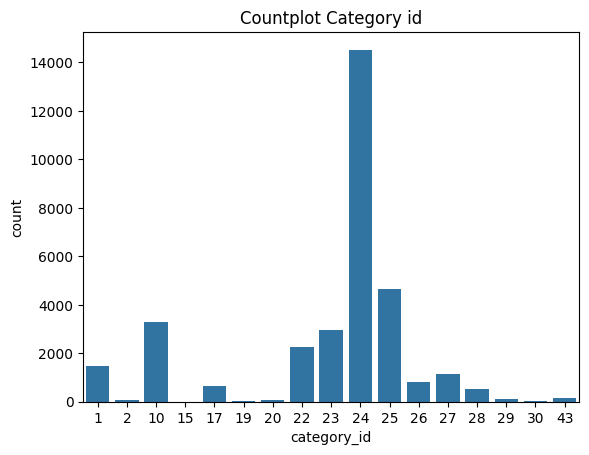

In [75]:
sns.countplot(data=df, x='category_id')
plt.title('Countplot Category id')

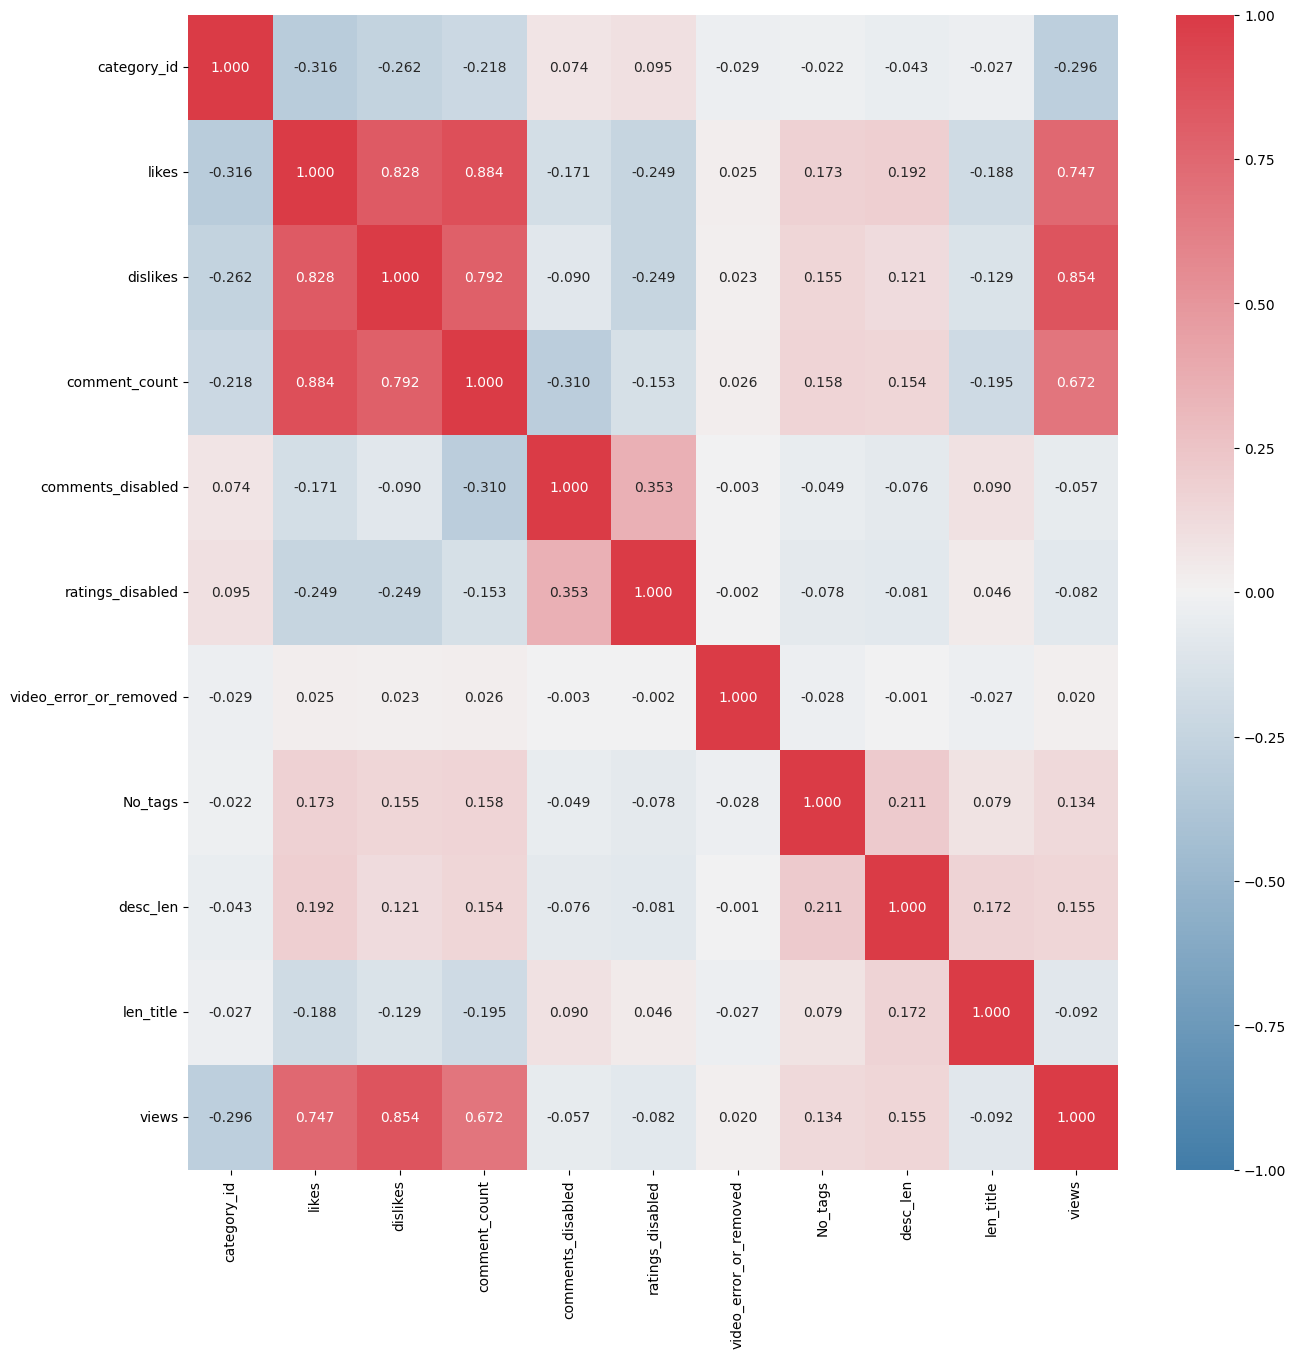

In [24]:
# Heatmap (corr spearman)
plt.figure(figsize=(15,15))
cmap_custom = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(data = df.corr(numeric_only=True, method='spearman'), cmap=cmap_custom, annot=True, fmt='.3f', vmin=-1, vmax=1)
plt.show()

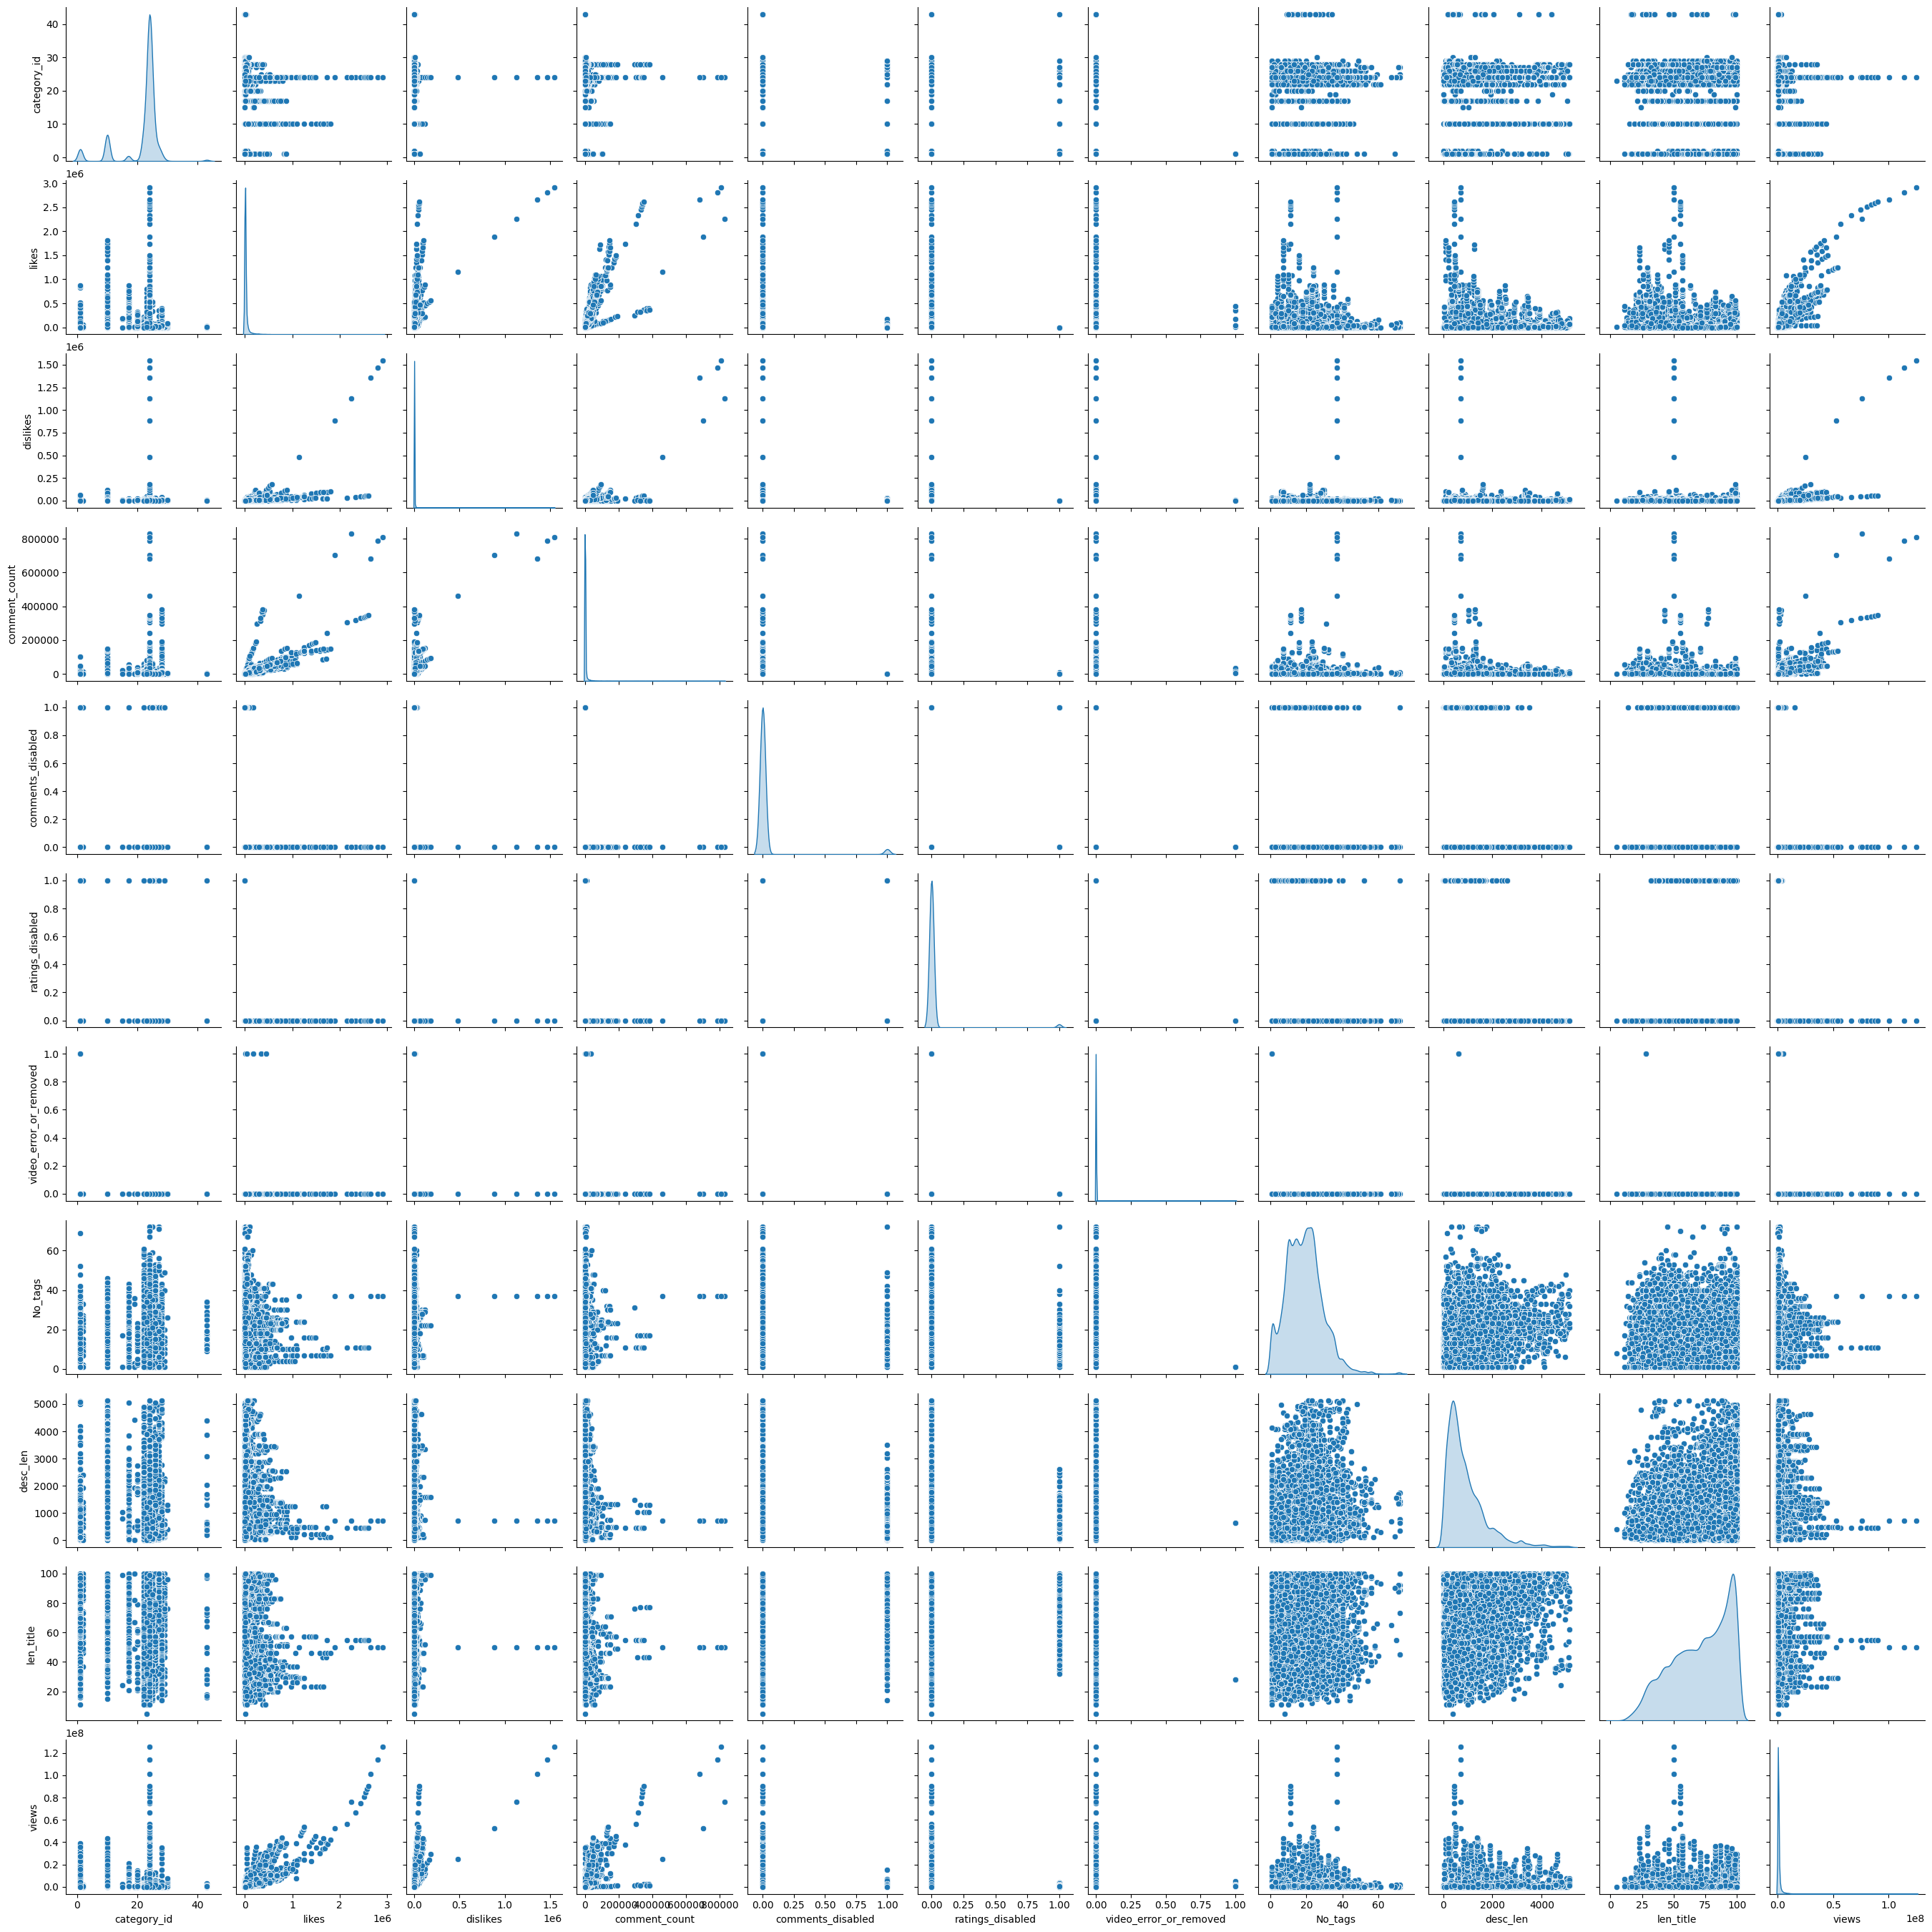

In [25]:
# Pairplot
sns.pairplot(df, diag_kind='kde')
plt.show()

# Pre-Processing & Feature Engineering

In [26]:
# Make a copy of original dataframe for preprocessing and encoding process

df_encoding = df.copy()

df_encoding.sample(5)

trending_date                                              title  \
29894    2018-05-07  சர்ச்சைக்குள்ளாகிறது இருட்டு அறையில் முரட்டுக்...   
31314    2018-05-15                Priyamanaval Episode 1014, 14/05/18   
3573     2017-12-03  WHAT HAPPENS IN BOYS' GROUP CHAT | RishhSome, ...   
3530     2017-12-02  കടൽ കലി തുള്ളുമ്പോൾ കടലിൽ അകപ്പെട്ട് പോയ കൂടപ്...   
18727    2018-02-27  மது போதையில் நிதானம் இழந்து குளியல் தொட்டியில்...   

           channel_title  category_id publish_time  \
29894  News 18 Tamilnadu           25     01:50:49   
31314          VikatanTV           43     17:00:03   
3573           Rishhsome           23     14:15:50   
3530     Malayalam Media           24     10:00:06   
18727       Polimer News           25     12:27:52   

                                                    tags  likes  dislikes  \
29894  News 18 Tamil Nadu|"நியூஸ்18 தமிழ்நாடு"|"Tamil...   3806       809   
31314  Priyamanaval 14.05.2018|"Priyamanaval 14 May 2...   2917       781   
3573   rishhsome|"vines"|"rishabh rana"|"rishabh"|"fu...  22040      1362   
3530                                              [none]    201        13   
18727  Tn Politics Updates|"Tamil Nadu News"|"Tamil N...   1409       121   

       comment_count  comments_disabled  ratings_disabled  \
29894            614              False             False   
31314            362              False             False   
3573            1208              False             False   
3530              26              False             False   
18727            217              False             False   

       video_error_or_removed  \
29894                   False   
31314                   False   
3573                    False   
3530                    False   
18727                   False   

                                             description  No_tags  desc_len  \
29894  காறித்துப்ப வைக்கிறது படத்தின் முன்னோட்டம் - ந...       18       704   
31314  Priyamanaval Episode 1014Subscribe: https://go...       12       376   
3573   Watch my latest video!\n\n\nHarshdeep Ahuja: h...       15       567   
3530   കടൽ കലി തുള്ളുമ്പോൾ കടലിൽ അകപ്പെട്ട് പോയ കൂടപ്...        1       237   
18727  மது போதையில் நிதானம் இழந்து குளியல் தொட்டியில்...        6       417   

       len_title publish_date   views  
29894         57   2018-05-03  917499  
31314         35   2018-05-14  449197  
3573          74   2017-12-02  291855  
3530          84   2017-12-01   29851  
18727         76   2018-02-26  186260

### Feature Engineering for Date and Time

In [47]:
df_encoding[date].columns

Index(['trending_date', 'publish_date', 'publish_time'], dtype='object')

In [48]:
#Check data types for dates
df[date].info()

<class 'pandas.core.frame.DataFrame'>
Index: 32562 entries, 0 to 36769
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   trending_date  32562 non-null  object        
 1   publish_date   32562 non-null  datetime64[ns]
 2   publish_time   32562 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1017.6+ KB


We will need to change the data type for trending_date to datetime

In [49]:
df_encoding[['publish_time', 'publish_date', 'trending_date']].head()

publish_time publish_date trending_date
0     12:20:39   2017-11-12    2017-11-14
1     05:43:56   2017-11-13    2017-11-14
2     15:48:08   2017-11-12    2017-11-14
3     07:08:48   2017-11-12    2017-11-14
4     01:14:16   2017-11-13    2017-11-14

We could find how many days does it took for each video to become trending, and also find out at what publish time (hour) does a video will become trending 

In [50]:
# Split hour, minute, and second into separated columns
df_encoding[['publish_hour', 'publish_minute', 'publish_second']] = df_encoding['publish_time'].str.split(':', expand=True)

# Change data types into integer
df_encoding['publish_hour'] = df_encoding['publish_hour'].astype(int) #the most important one in publish time in a day is the hour not minutes or seconds
df_encoding.drop(columns=['publish_minute', 'publish_second'], inplace=True)
# df['minute_publish'] = df['minute_publish'].astype(int)
# df['second_publish'] = df['second_publish'].astype(int)

# Make time classifier into AM and PM
df_encoding['publish_hour_category'] = np.where((df_encoding['publish_hour'] >= 0) & (df_encoding['publish_hour'] <= 12), 'AM', 'PM')

# Quick label encoding for publish_hour_category
df_encoding['publish_hour_category'] = df_encoding['publish_hour_category'].astype('category').cat.codes

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df_encoding['publish_hour_category'] = le.fit_transform(df_encoding['publish_hour_category'])

In [51]:
#Check transformation of publish_hour_category (AM : 0, PM : 1)
df_encoding[['publish_hour', 'publish_hour_category']].sample(10)

publish_hour  publish_hour_category
34177            16                      1
17877            13                      1
21104             3                      0
33362             8                      0
15022            15                      1
6774              4                      0
10802            10                      0
17822            14                      1
31495            14                      1
24508            14                      1

In [52]:
# Convert trending_date form object to datetime
df_encoding['trending_date'] = pd.to_datetime(df_encoding['trending_date'])

# Splitting trending date into year, month, and day
df_encoding['trending_year'] = df_encoding['trending_date'].dt.year
df_encoding['trending_month'] = df_encoding['trending_date'].dt.month
df_encoding['trending_day'] = df_encoding['trending_date'].dt.day
df_encoding['trending_day_of_week'] = df_encoding['trending_date'].dt.day_of_week
df_encoding['trending_day_of_year'] = df_encoding['trending_date'].dt.day_of_year
df_encoding['is_weekend_trending_day_of_week'] = df_encoding['trending_date'].dt.day_of_week.isin([5, 6])

#Check engineered features for trending_date
df_encoding[['trending_date', 'trending_year', 'trending_month', 'trending_day', 'trending_day_of_week', 'trending_day_of_year', 'is_weekend_trending_day_of_week']].head()

trending_date  trending_year  trending_month  trending_day  \
0    2017-11-14           2017              11            14   
1    2017-11-14           2017              11            14   
2    2017-11-14           2017              11            14   
3    2017-11-14           2017              11            14   
4    2017-11-14           2017              11            14   

   trending_day_of_week  trending_day_of_year  is_weekend_trending_day_of_week  
0                     1                   318                            False  
1                     1                   318                            False  
2                     1                   318                            False  
3                     1                   318                            False  
4                     1                   318                            False

In [53]:
# Convert publish_date form object to datetime
df_encoding['publish_date'] = pd.to_datetime(df_encoding['publish_date'])

# Splitting publish_date into year, month, and day
df_encoding['publish_year'] = df_encoding['publish_date'].dt.year
df_encoding['publish_month'] = df_encoding['publish_date'].dt.month
df_encoding['publish_day'] = df_encoding['publish_date'].dt.day
df_encoding['publish_day_of_week'] = df_encoding['publish_date'].dt.day_of_week
df_encoding['publish_day_of_year'] = df_encoding['publish_date'].dt.day_of_year
df_encoding['is_weekend_publish_day_of_week'] = df_encoding['publish_date'].dt.day_of_week.isin([5,6])

#Check engineered features for publish_date
df_encoding[['publish_date', 'publish_year', 'publish_month', 'publish_day', 'publish_day_of_week', 'publish_day_of_year', 'is_weekend_publish_day_of_week']].head()

publish_date  publish_year  publish_month  publish_day  publish_day_of_week  \
0   2017-11-12          2017             11           12                    6   
1   2017-11-13          2017             11           13                    0   
2   2017-11-12          2017             11           12                    6   
3   2017-11-12          2017             11           12                    6   
4   2017-11-13          2017             11           13                    0   

   publish_day_of_year  is_weekend_publish_day_of_week  
0                  316                            True  
1                  317                           False  
2                  316                            True  
3                  316                            True  
4                  317                           False

In [54]:
# Label encoding for is_weekend for trending and publish

# Label encoding for is_weekend features
df_encoding.replace({'is_weekend_trending_day_of_week':{'False':0,'True':1},
                     'is_weekend_publish_day_of_week':{'False':0,'True':1}}, inplace=True)

df_encoding['is_weekend_trending_day_of_week'] = df_encoding['is_weekend_trending_day_of_week'].astype('int64')
df_encoding['is_weekend_publish_day_of_week'] = df_encoding['is_weekend_publish_day_of_week'].astype('int64')

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df_encoding['is_weekend_trending_day_of_week'] = le.fit_transform(df_encoding['is_weekend_trending_day_of_week'])
# df_encoding['is_weekend_publish_day_of_week'] = le.fit_transform(df_encoding['is_weekend_publish_day_of_week'])

In [55]:
# Calculate days difference between publish date to trending date
df_encoding['diff_publish_trending'] = (df_encoding['trending_date'] - df_encoding['publish_date']) / np.timedelta64(1, 'D')

This code used to calculate the difference in days between the 'trending_date' and 'publish_date' columns in DataFrame `df_encoding` and then assigning the result to a new column named 'diff_publish_trending'.

explanation :

- `df_encoding['trending_date']`: Accessing the 'trending_date' column in the DataFrame.
- `df_encoding['publish_date']`: Accessing the 'publish_date' column in the DataFrame.
- `(df_encoding['trending_date'] - df_encoding['publish_date'])`: Calculating the time difference between 'trending_date' and 'publish_date'. This would result in a Pandas Series with time differences.
- `/ np.timedelta64(1, 'D')`: Dividing the time differences by the number of days (1 day) to convert the time difference to days.

In [56]:
# Re-arrange the columns (views in last)
df_1 = df_encoding.drop(columns='views')
df_2 = df_encoding['views']
df_encoding = pd.concat([df_1, df_2], axis='columns')

In [57]:
#Check engineered dataframe info
df_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32562 entries, 0 to 36769
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   trending_date                    32562 non-null  datetime64[ns]
 1   title                            32562 non-null  object        
 2   channel_title                    32562 non-null  object        
 3   category_id                      32562 non-null  int64         
 4   publish_time                     32562 non-null  object        
 5   tags                             32562 non-null  object        
 6   likes                            32562 non-null  int64         
 7   dislikes                         32562 non-null  int64         
 8   comment_count                    32562 non-null  int64         
 9   comments_disabled                32562 non-null  bool          
 10  ratings_disabled                 32562 non-null  bool          

<Axes: >

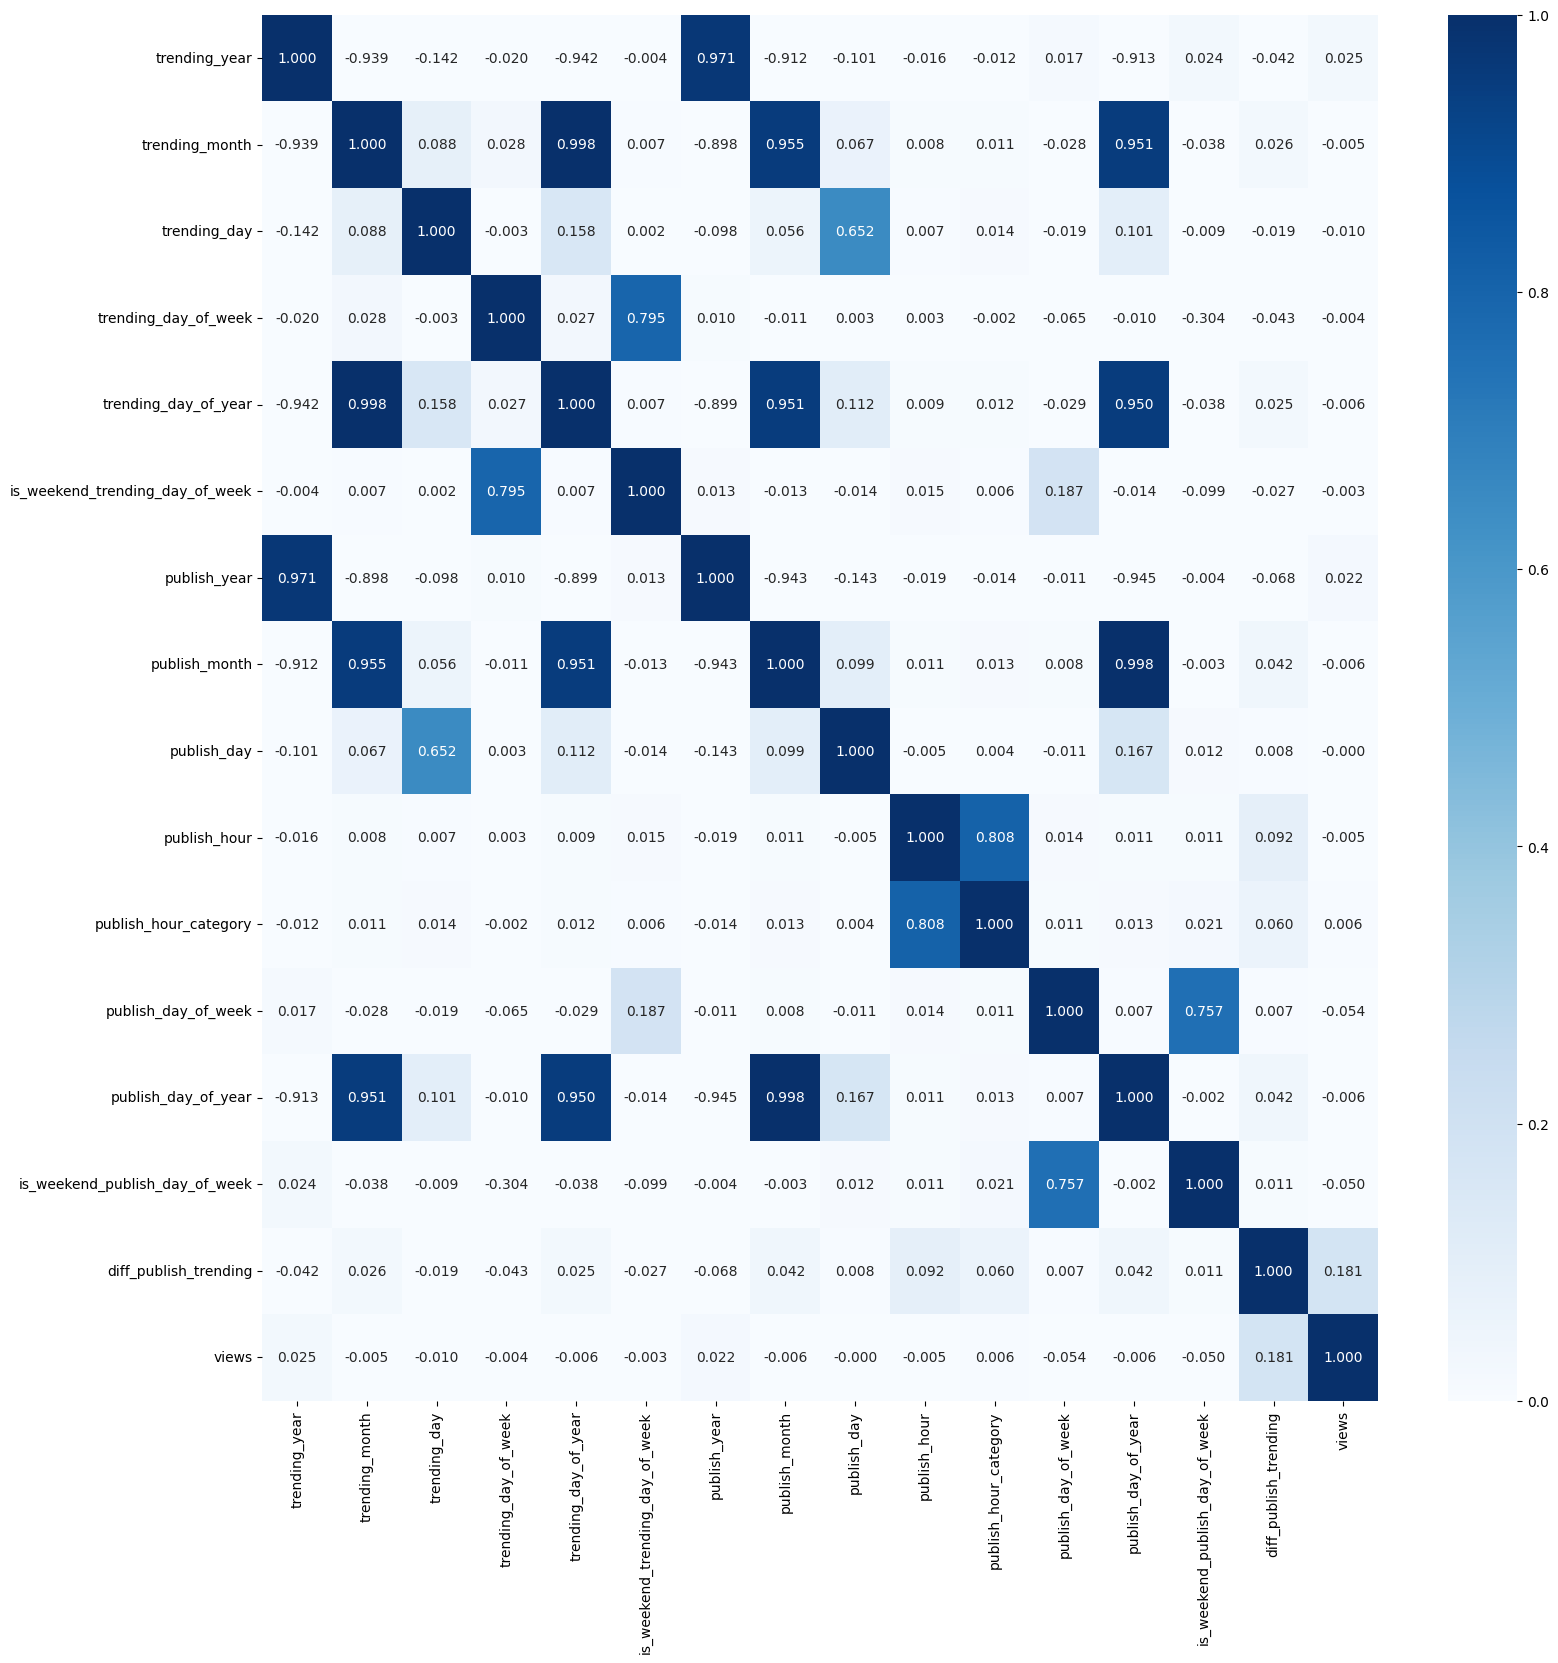

In [60]:
# Heatmap for every date features to target (views)
plt.figure(figsize=(18, 18))
sns.heatmap(df_encoding[['trending_year', 'trending_month', 'trending_day', 'trending_day_of_week', 'trending_day_of_year', 'is_weekend_trending_day_of_week', 'publish_year', 'publish_month', 'publish_day', 'publish_hour', 'publish_hour_category', 'publish_day_of_week', 'publish_day_of_year', 'is_weekend_publish_day_of_week', 'diff_publish_trending', 'views']].corr(numeric_only=True), cmap='Blues', annot=True, fmt='.3f', vmin=0, vmax=1)

From the new features, 'diff_days' will be included because it has the highest correlation with the target variable. Additionally, some potential features with correlations greater than |0.05|, such as 'publish_day_of_week' (excluding 'is_weekend_publish_day_of_week' as it is a derivative of 'publish_day_of_week' to prevent multicollinearity)

### Feature Engineering For Bool (One-Hot Encoding)

In [63]:
df_encoding[bool].columns

Index(['comments_disabled', 'ratings_disabled', 'video_error_or_removed'], dtype='object')

In [64]:
for col in bool :
    print(f'value counts for {col}')
    print(df_encoding[col].value_counts())
    print()

value counts for comments_disabled
comments_disabled
False    31478
True      1084
Name: count, dtype: int64

value counts for ratings_disabled
ratings_disabled
False    31873
True       689
Name: count, dtype: int64

value counts for video_error_or_removed
video_error_or_removed
False    32553
True         9
Name: count, dtype: int64



In [65]:
# Before Encoding
df_encoding[bool].head()

comments_disabled  ratings_disabled  video_error_or_removed
0              False             False                   False
1               True             False                   False
2              False             False                   False
3              False             False                   False
4              False             False                   False

In [66]:
# One-hot Encoding

columns_to_ohe = ['comments_disabled', 'ratings_disabled', 'video_error_or_removed']

# Loop through the columns and perform one-hot encoding
for column in columns_to_ohe:
    onehots = pd.get_dummies(df_encoding[column], prefix=column)
    onehots = onehots.astype(int)
    df_encoding = df_encoding.join(onehots)

# Drop the original columns after one-hot encoding
df_encoding = df_encoding.drop(columns=columns_to_ohe)

In [70]:
# After Encoding
df_encoding.iloc[:, -6:]

comments_disabled_False  comments_disabled_True  \
0                            1                       0   
1                            0                       1   
2                            1                       0   
3                            1                       0   
4                            1                       0   
...                        ...                     ...   
36739                        1                       0   
36740                        1                       0   
36741                        1                       0   
36758                        1                       0   
36769                        1                       0   

       ratings_disabled_False  ratings_disabled_True  \
0                           1                      0   
1                           1                      0   
2                           1                      0   
3                           1                      0   
4                           1                      0   
...                       ...                    ...   
36739                       1                      0   
36740                       1                      0   
36741                       1                      0   
36758                       1                      0   
36769                       1                      0   

       video_error_or_removed_False  video_error_or_removed_True  
0                                 1                            0  
1                                 1                            0  
2                                 1                            0  
3                                 1                            0  
4                                 1                            0  
...                             ...                          ...  
36739                             1                            0  
36740                             1                            0  
36741                             1                            0  
36758                             1                            0  
36769                             1                            0  

[32562 rows x 6 columns]

### Final Check for Every Feature Before Selection

In [76]:
# Re-arrange the columns (views in last)
df_1 = df_encoding.drop(columns='views')
df_2 = df_encoding['views']
df_encoding = pd.concat([df_1, df_2], axis='columns')

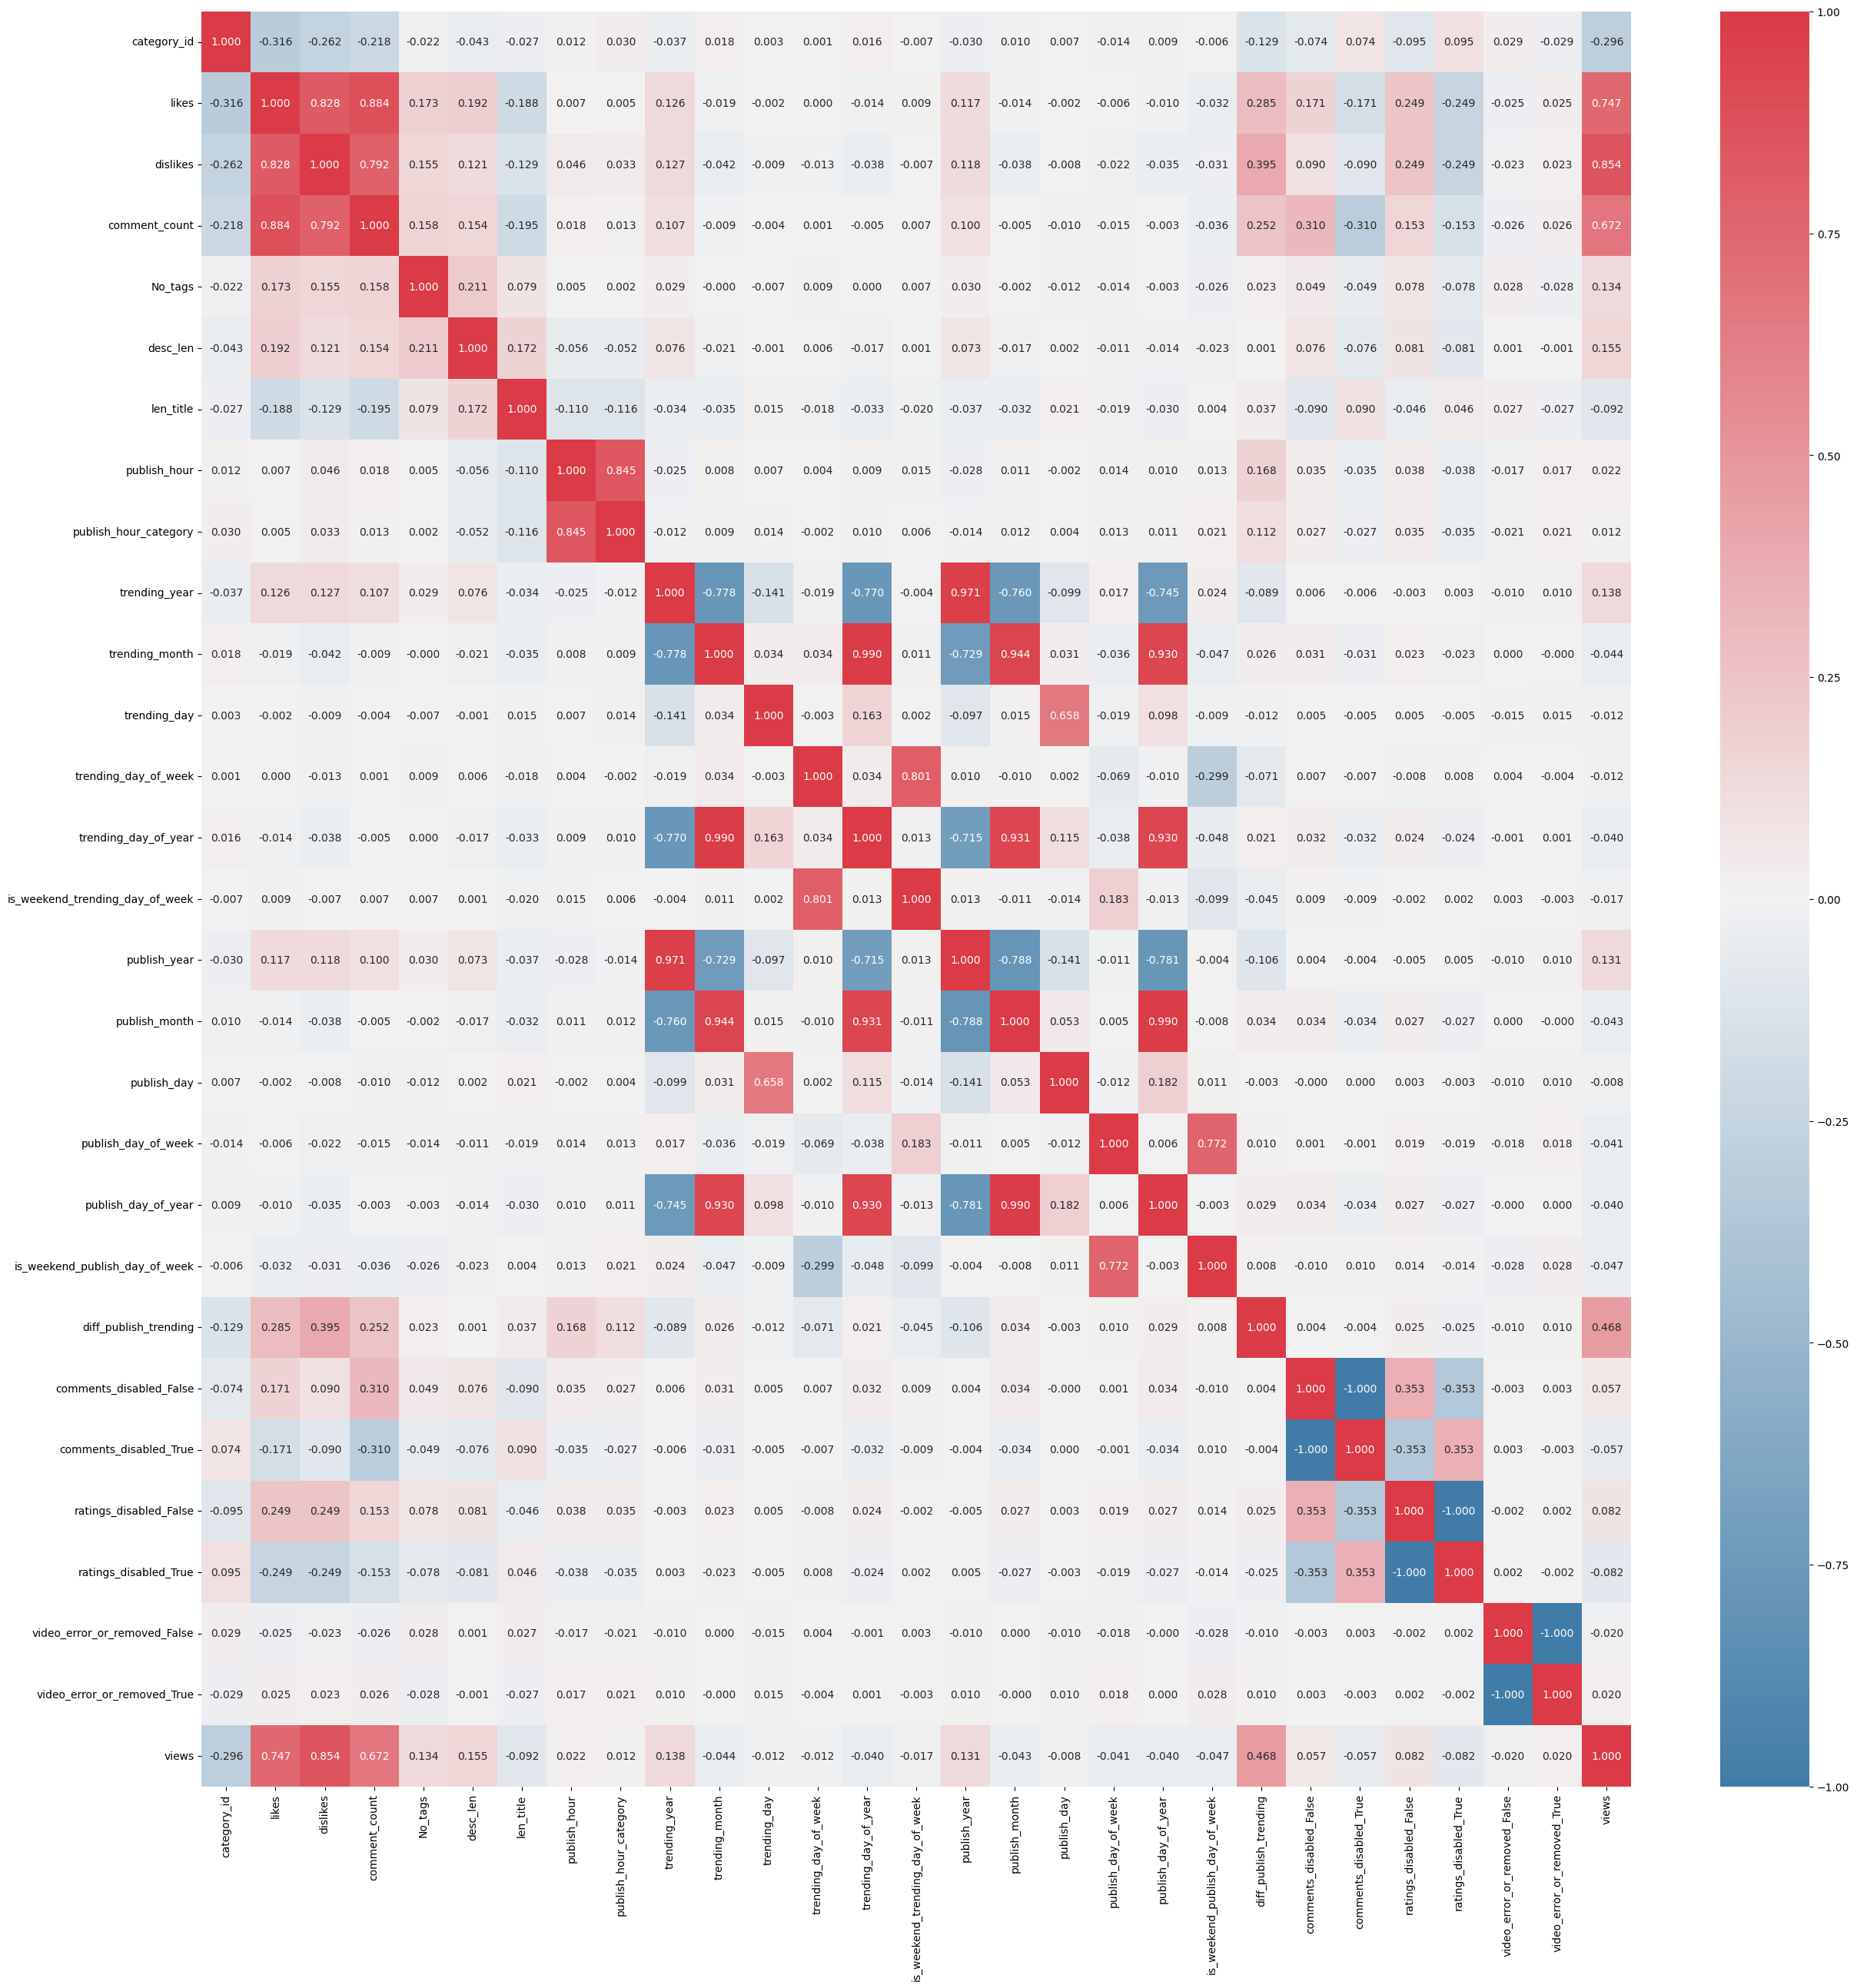

In [77]:
# Heatmap (corr spearman)
plt.figure(figsize=(30,30))
cmap_custom = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(data = df_encoding.corr(numeric_only=True, method='spearman'), cmap=cmap_custom, annot=True, fmt='.3f', vmin=-1, vmax=1)
plt.show()

In this case, the features to be used include: 'category_id', 'likes', 'dislikes', 'No_tags', 'desc_len', 'diff_days', and features resulting from one-hot encoding based on considerations of the problem context, feature-target correlation, feature-feature correlation. Additionally, redundant features (with high correlation) will be discarded, keeping only one with the highest to target.

# Feature Selection

In [82]:
# Select only relevant features

df_model = df_encoding.copy()

selected_features = ['category_id', 'likes', 'dislikes', 'No_tags', 'desc_len', 'diff_publish_trending',
                     'comments_disabled_False','comments_disabled_True', 'ratings_disabled_False',
                     'ratings_disabled_True', 'video_error_or_removed_False', 'video_error_or_removed_True', 'views']

df_model = df_model[selected_features]
df_model.sample(5)

category_id   likes  dislikes  No_tags  desc_len  \
16340           24     269       100        1      2121   
36070           24  426230     19042       26       961   
10539           10  124964     12611       21      4341   
2789             1    1745        55       22       222   
19974           29    1514        43        1       190   

       diff_publish_trending  comments_disabled_False  comments_disabled_True  \
16340                    2.0                        1                       0   
36070                    4.0                        1                       0   
10539                    2.0                        1                       0   
2789                     3.0                        1                       0   
19974                    2.0                        1                       0   

       ratings_disabled_False  ratings_disabled_True  \
16340                       1                      0   
36070                       1                      0   
10539                       1                      0   
2789                        1                      0   
19974                       1                      0   

       video_error_or_removed_False  video_error_or_removed_True     views  
16340                             1                            0    157540  
36070                             1                            0  18540761  
10539                             1                            0   5629046  
2789                              1                            0     74767  
19974                             1                            0     29807

# Train-Test Split

In [83]:
# Spliting data into train-test
x = df_model.drop(columns=['views'])
y = df_model[['views']]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Handling Outliers

In [84]:
#Make temporary dataframe of features and target for train set
df_train_handling_outliers = pd.concat([x_train, y_train], axis='columns')

In [91]:
columns_to_handle_outliers = ['category_id', 'likes', 'dislikes', 'No_tags', 'desc_len', 'diff_publish_trending']

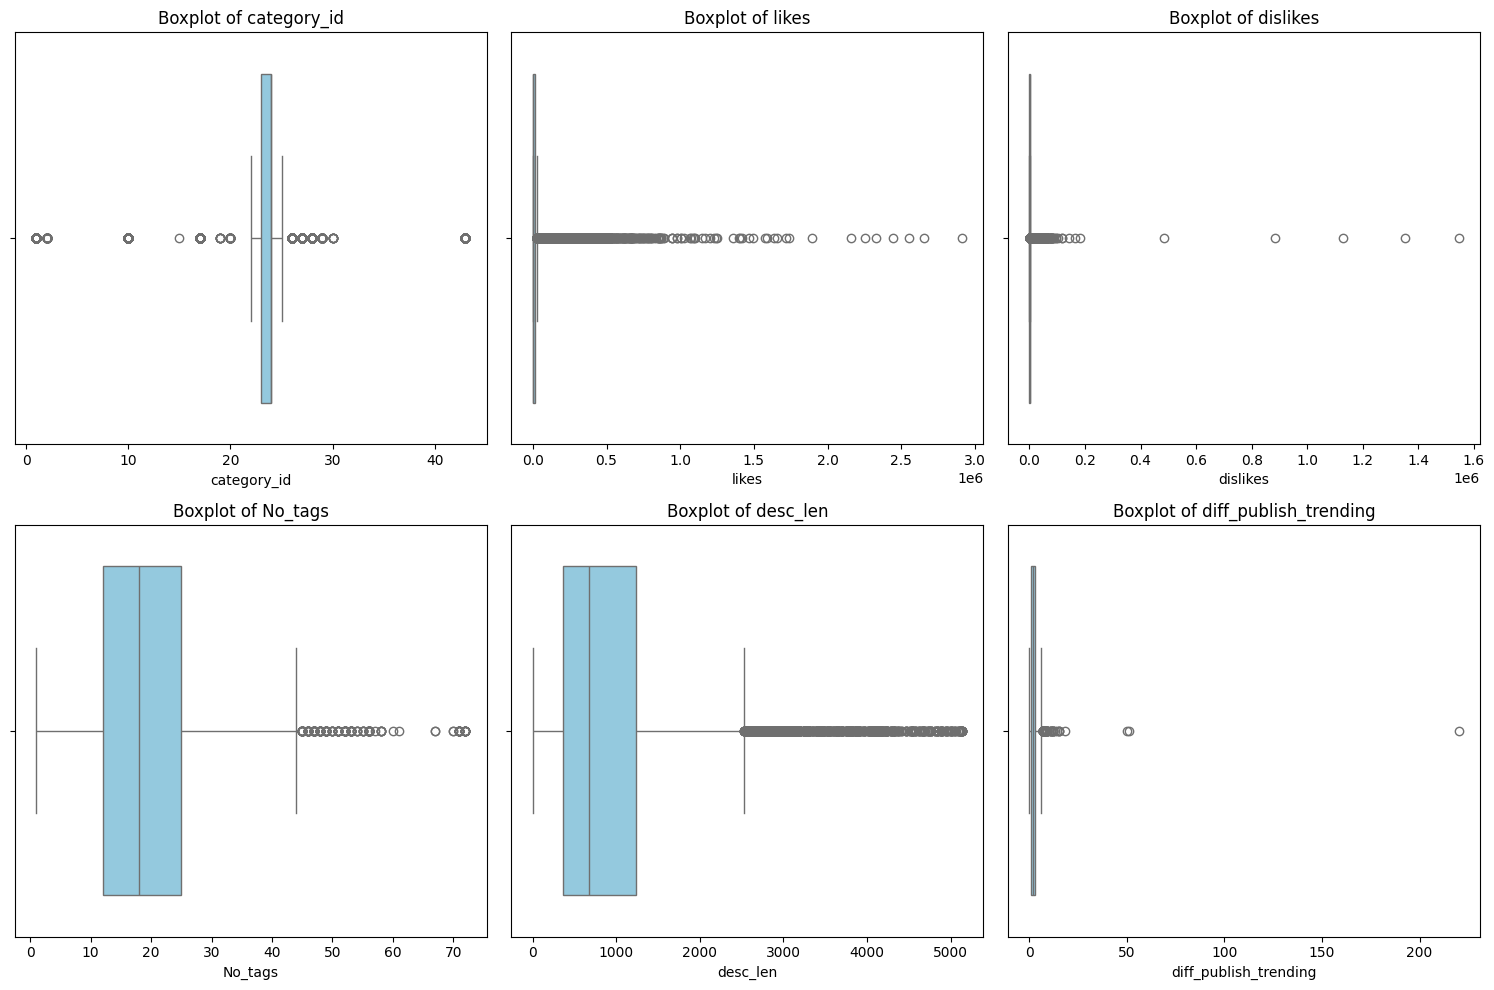

In [94]:
# Boxplot to check outliers
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i in range(len(columns_to_handle_outliers)) :
  sns.boxplot(ax=axes[i], x=df_train_handling_outliers[columns_to_handle_outliers[i]], orient='h', color='skyblue')
  axes[i].set_title(f'Boxplot of {columns_to_handle_outliers[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(columns_to_handle_outliers) < len(axes) :
    axes[len(columns_to_handle_outliers)].remove()

plt.tight_layout()

In [95]:
# Remove outliers with IQR method

print(f'The number of rows before filtering out outliers : {len(df_train_handling_outliers)}')

filtered_entries = np.array([True] * len(df_train_handling_outliers))

# Select features with outliers
for col in columns_to_handle_outliers:

    Q1 = df_train_handling_outliers[col].quantile(0.25)
    Q3 = df_train_handling_outliers[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)

    filtered_entries = ((df_train_handling_outliers[col] >= lower_bound) & (df_train_handling_outliers[col] <= upper_bound)) & filtered_entries

df_train_handling_outliers = df_train_handling_outliers[filtered_entries]

print(f'The number of rows after filtering out outliers: {len(df_train_handling_outliers)}')

The number of rows before filtering out outliers : 22793
The number of rows after filtering out outliers: 14085


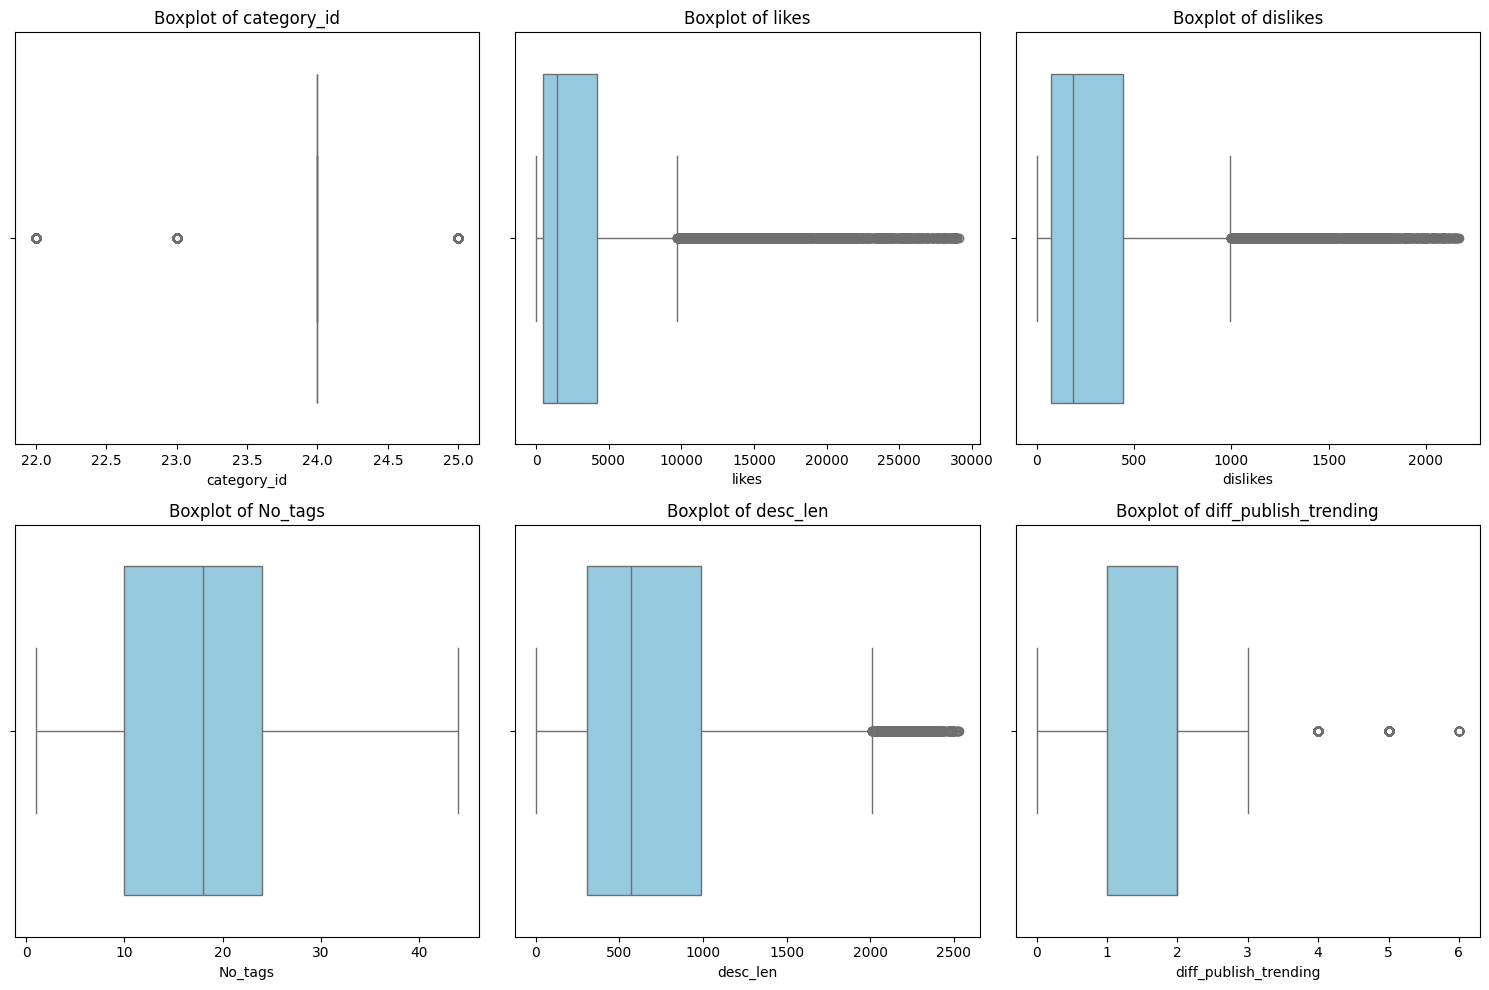

In [96]:
# Boxplot after handling outliers
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i in range(len(columns_to_handle_outliers)) :
  sns.boxplot(ax=axes[i], x=df_train_handling_outliers[columns_to_handle_outliers[i]], orient='h', color='skyblue')
  axes[i].set_title(f'Boxplot of {columns_to_handle_outliers[i]}')


# Remove the last subplot if there are fewer features than subplots
if len(columns_to_handle_outliers) < len(axes):
    axes[len(columns_to_handle_outliers)].remove()

plt.tight_layout()

In [97]:
#Split the features and target for train set again
x_train = df_train_handling_outliers.drop(columns='views')
y_train = df_train_handling_outliers['views']

# Feature Scaling

Scaling will be done to train and test data

In [98]:
x_train

category_id  likes  dislikes  No_tags  desc_len  diff_publish_trending  \
20257           24    422        55       27       465                    1.0   
1216            24   1186       129       12       373                    1.0   
36295           24   5264      1053        7      2232                    2.0   
10227           23  12736       349       31       363                    2.0   
12728           23   9842       574        1       181                    3.0   
...            ...    ...       ...      ...       ...                    ...   
6312            24   3781       148       13        86                    1.0   
22272           22   3348       357       12        84                    1.0   
5437            24     50        21       35       211                    1.0   
860             24    135       160       21      1149                    3.0   
24692           24  11174       162       11       947                    2.0   

       comments_disabled_False  comments_disabled_True  \
20257                        1                       0   
1216                         1                       0   
36295                        1                       0   
10227                        1                       0   
12728                        1                       0   
...                        ...                     ...   
6312                         1                       0   
22272                        1                       0   
5437                         1                       0   
860                          1                       0   
24692                        1                       0   

       ratings_disabled_False  ratings_disabled_True  \
20257                       1                      0   
1216                        1                      0   
36295                       1                      0   
10227                       1                      0   
12728                       1                      0   
...                       ...                    ...   
6312                        1                      0   
22272                       1                      0   
5437                        1                      0   
860                         1                      0   
24692                       1                      0   

       video_error_or_removed_False  video_error_or_removed_True  
20257                             1                            0  
1216                              1                            0  
36295                             1                            0  
10227                             1                            0  
12728                             1                            0  
...                             ...                          ...  
6312                              1                            0  
22272                             1                            0  
5437                              1                            0  
860                               1                            0  
24692                             1                            0  

[14085 rows x 12 columns]

In [99]:
x_test

category_id  likes  dislikes  No_tags  desc_len  diff_publish_trending  \
14253           25   1863       472       21       751                    3.0   
23082           27   3058       662       29       612                    1.0   
31715           23   1209        83       33       217                    1.0   
5714            27   2570        86       26       788                    2.0   
7874            24   3634       349        8       198                    2.0   
...            ...    ...       ...      ...       ...                    ...   
36659           24  21543      2579       33      1564                    2.0   
21663           27   5096       437       29       300                    2.0   
32521           25   1118       443       11       357                    2.0   
27131           24   2329       236        2       421                    2.0   
27537           24   3020       168       17       663                    1.0   

       comments_disabled_False  comments_disabled_True  \
14253                        1                       0   
23082                        1                       0   
31715                        1                       0   
5714                         1                       0   
7874                         1                       0   
...                        ...                     ...   
36659                        1                       0   
21663                        1                       0   
32521                        1                       0   
27131                        1                       0   
27537                        1                       0   

       ratings_disabled_False  ratings_disabled_True  \
14253                       1                      0   
23082                       1                      0   
31715                       1                      0   
5714                        1                      0   
7874                        1                      0   
...                       ...                    ...   
36659                       1                      0   
21663                       1                      0   
32521                       1                      0   
27131                       1                      0   
27537                       1                      0   

       video_error_or_removed_False  video_error_or_removed_True  
14253                             1                            0  
23082                             1                            0  
31715                             1                            0  
5714                              1                            0  
7874                              1                            0  
...                             ...                          ...  
36659                             1                            0  
21663                             1                            0  
32521                             1                            0  
27131                             1                            0  
27537                             1                            0  

[9769 rows x 12 columns]

In [100]:
len(x_train.columns)

12

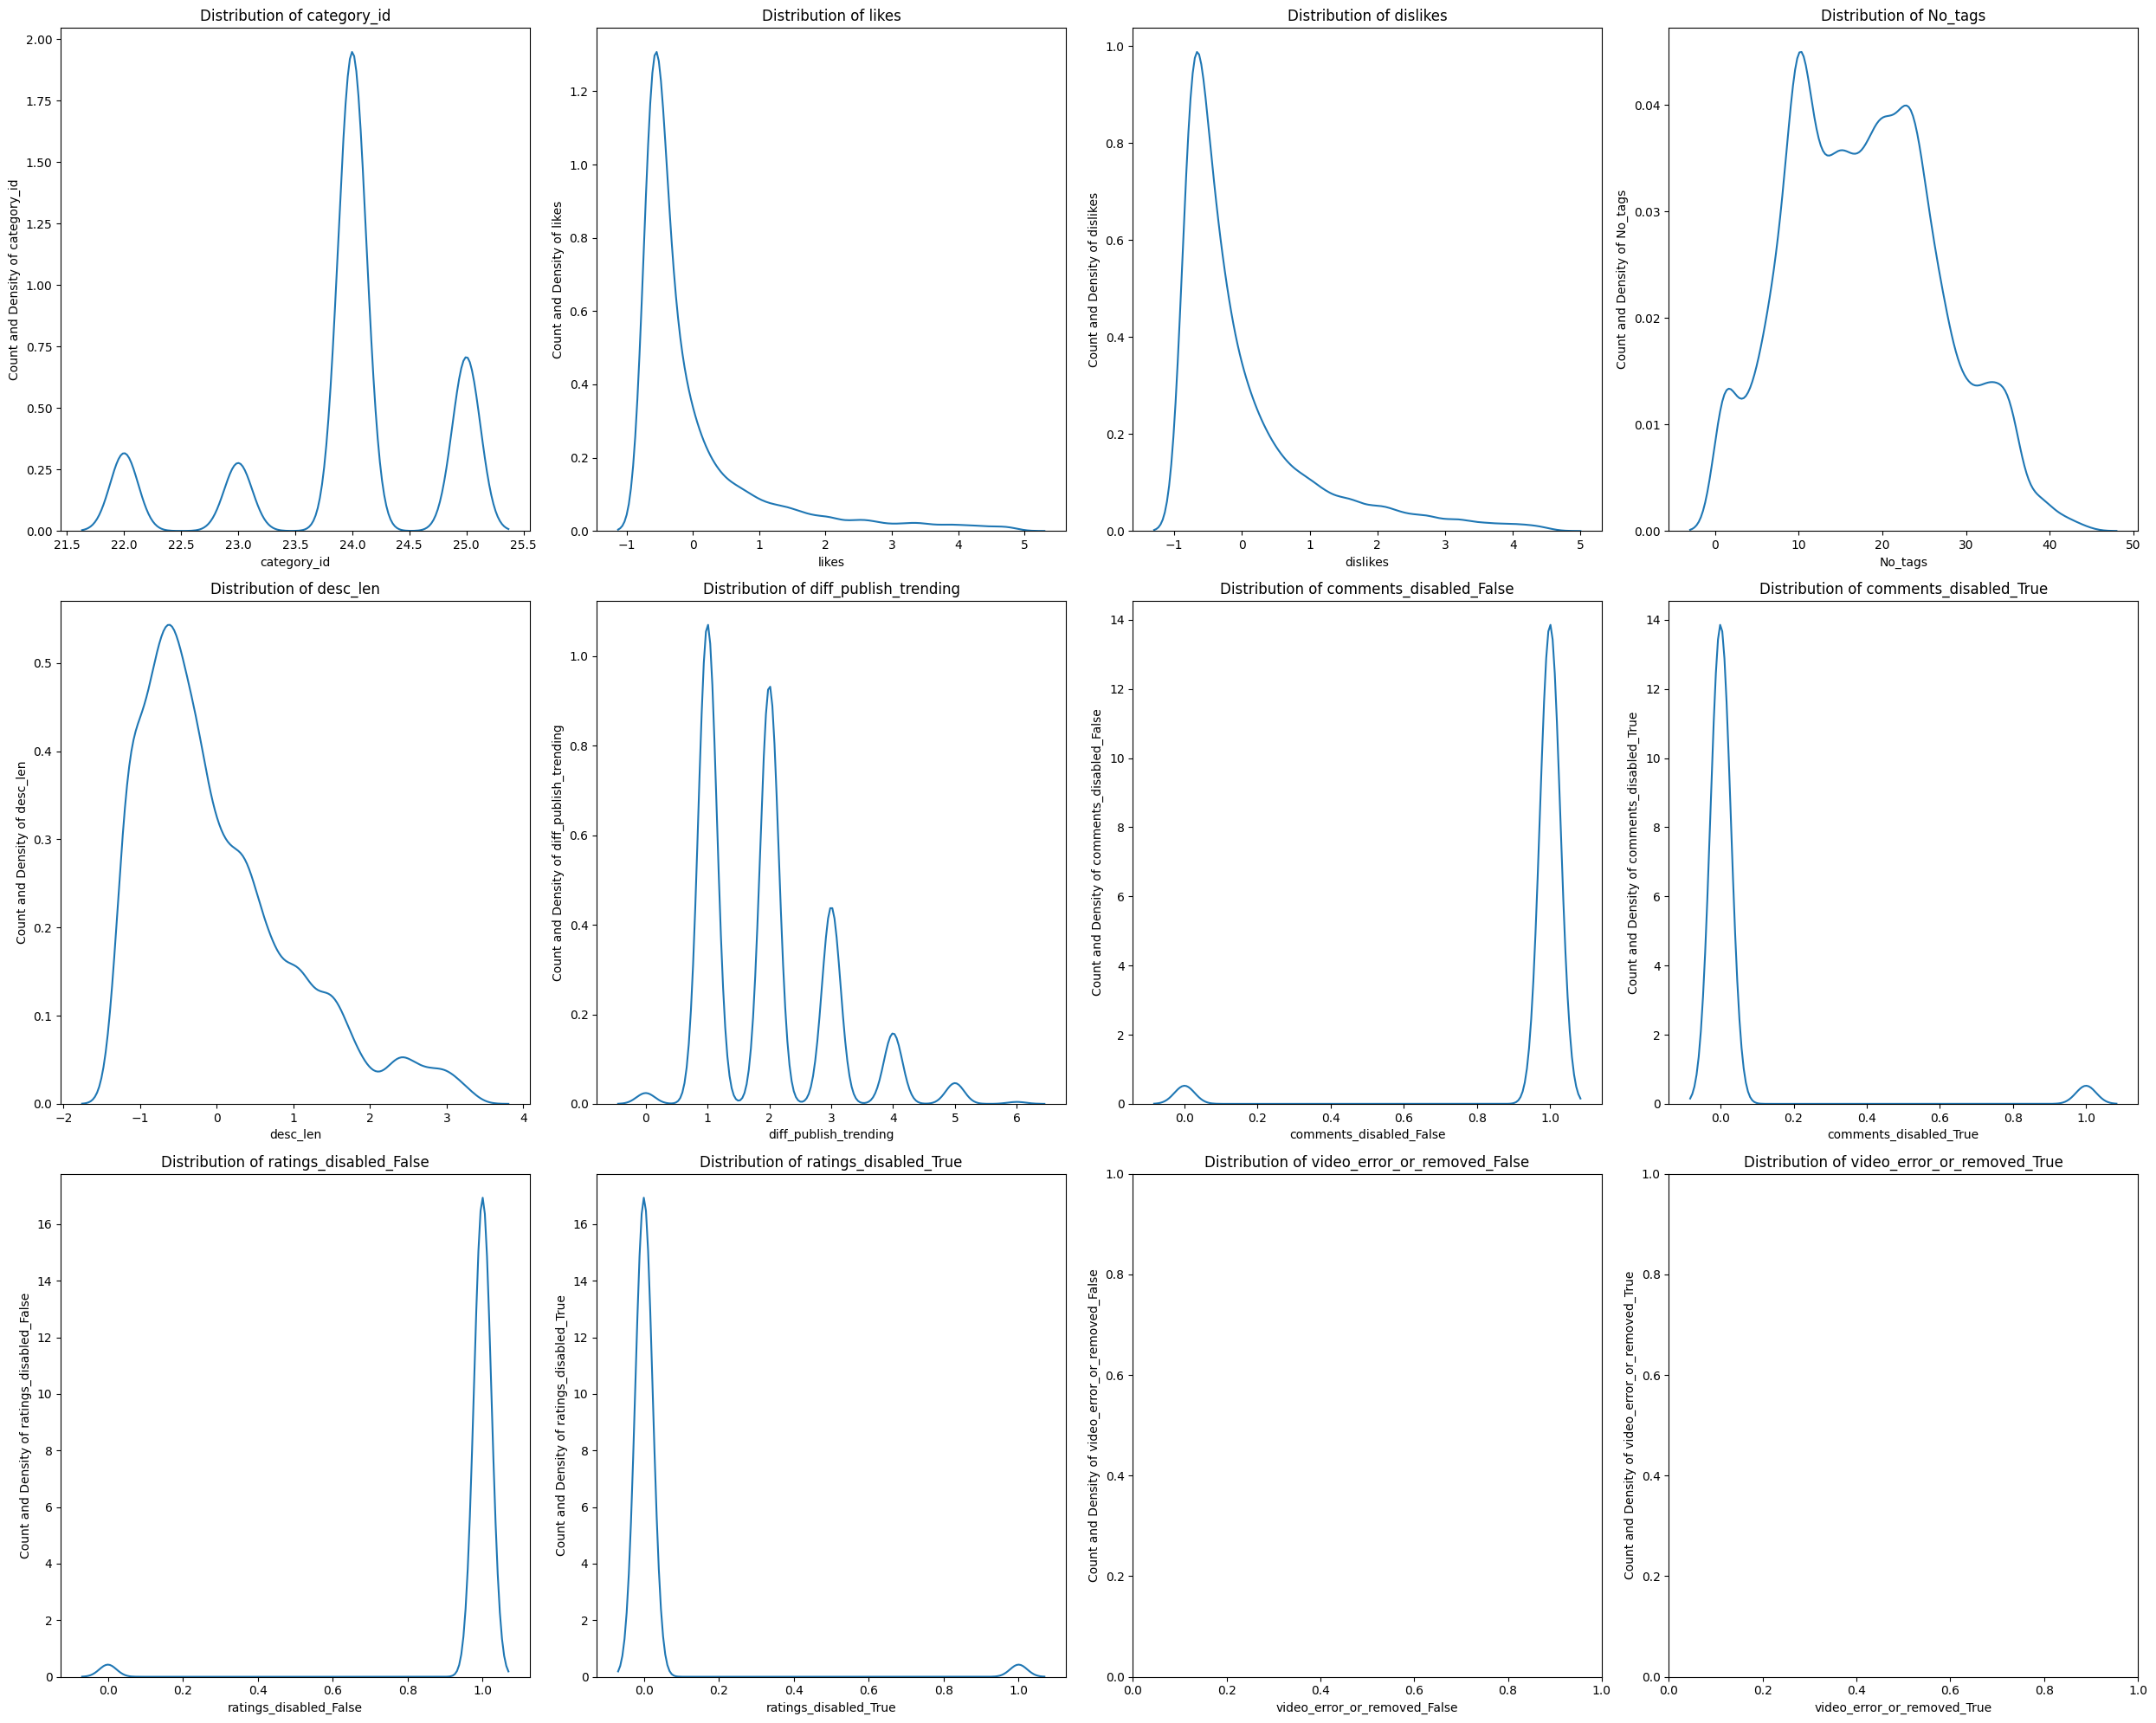

In [106]:
# Checking distribution before scaling
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(25,20))
axes = axes.flatten()

for i in range(len(x_train.columns)) :
    sns.kdeplot(ax=axes[i], x=x_train[x_train.columns[i]])
    axes[i].set_title(f'Distribution of {x_train.columns[i]}')
    axes[i].set_ylabel(f'Count and Density of {x_train.columns[i]}')
    axes[i].set_xlabel(f'{x_train.columns[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(x_train.columns) < len(axes) :
    axes[len(x_train.columns)].remove()

plt.tight_layout()

Scaling will not be done to all features, but only to features with have large numbers such as likes, dislikes, and desc_len

In [ ]:
# #Normalization (MinMaxScaller)
# from sklearn.preprocessing import MinMaxScaler
# ms = MinMaxScaler()

# columns_to_scale = ['Income', 'Age', 'Experience', 'Income_Age_Ratio', 'Profession', 'City', 'State'] #pilih kolom tertentu untuk dilakukan scaling (sesuai keterangan mentor)
# # columns_to_scale = x_train.columns.to_list() #pilih semua kolom

# scale_features = x_train[columns_to_scale]
# for n in scale_features:
#   x_train[n] = ms.fit_transform(x_train[[n]])
#   x_test[n] = ms.fit_transform(x_test[[n]])
#   # scaler.to_pickle(filename)

In [103]:
#Standardization (Z-score normalization)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

columns_to_scale = ['likes', 'dislikes', 'desc_len']

scale_features = x_train[columns_to_scale]
for n in scale_features:
  x_train[n] = ss.fit_transform(x_train[[n]])
  x_test[n] = ss.fit_transform(x_test[[n]])
  # scaler.to_pickle(filename)

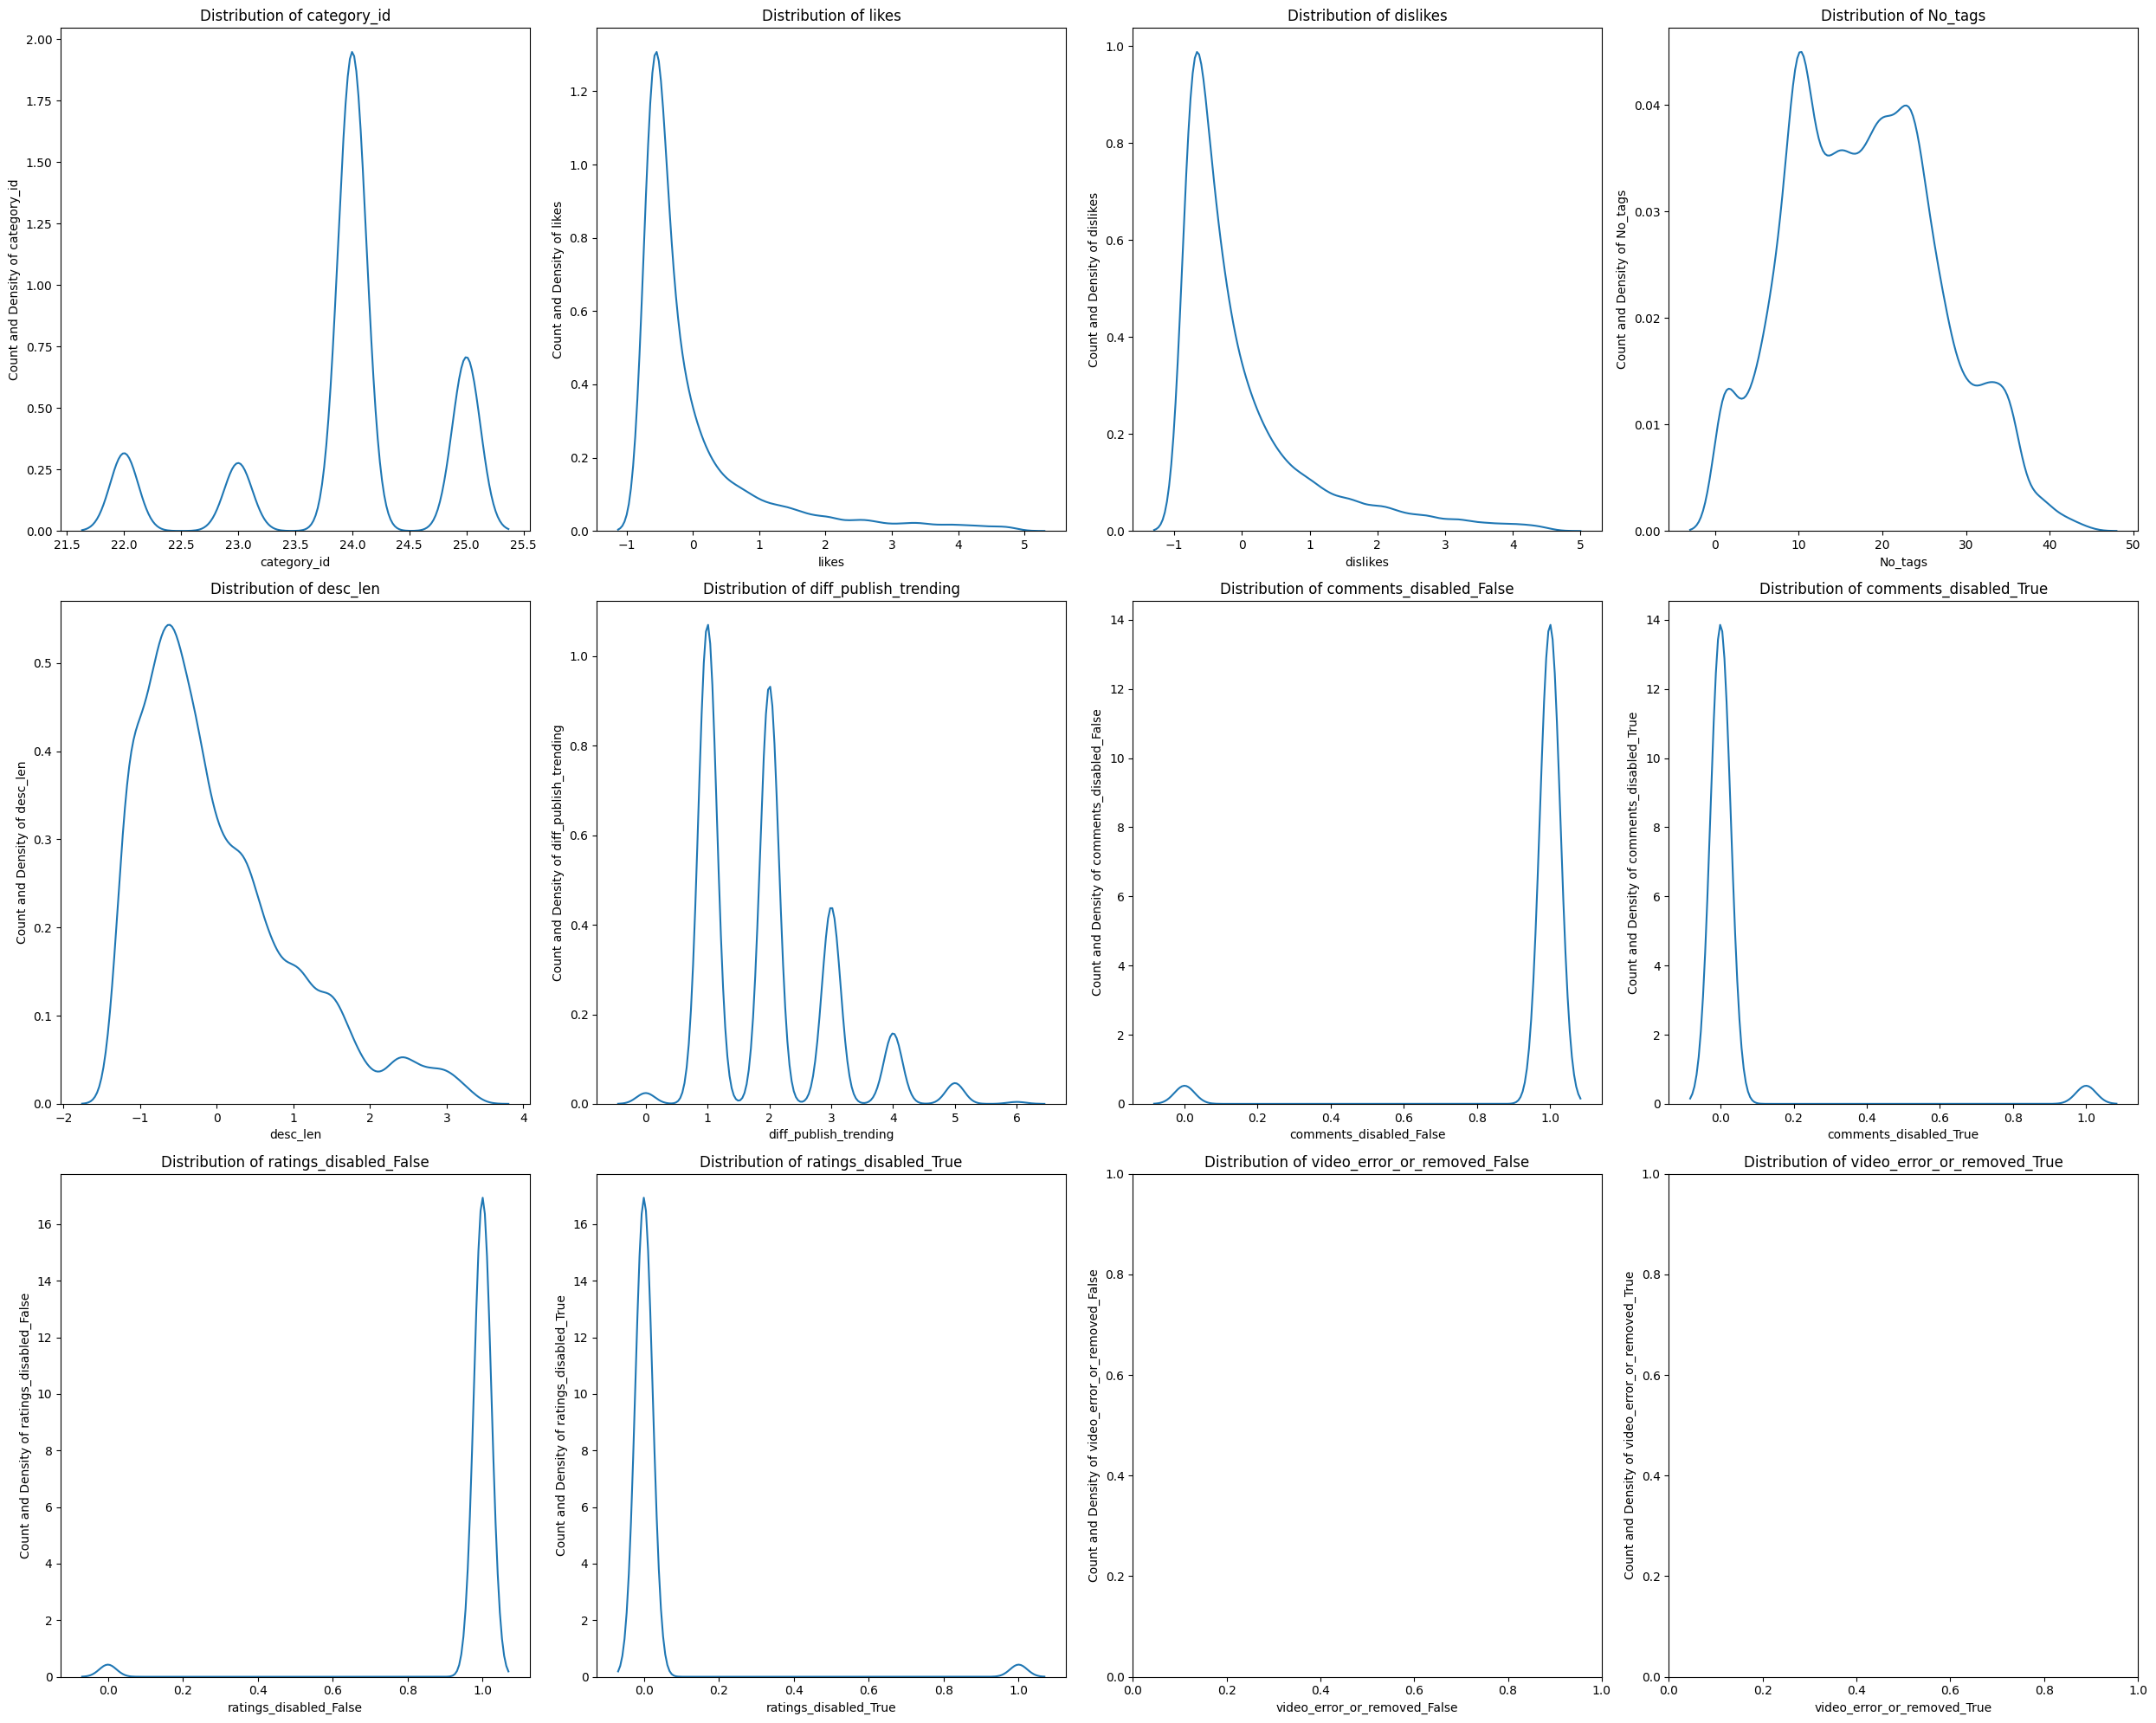

In [107]:
# Checking distribution before scaling
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(25,20))
axes = axes.flatten()

for i in range(len(x_train.columns)) :
    sns.kdeplot(ax=axes[i], x=x_train[x_train.columns[i]])
    axes[i].set_title(f'Distribution of {x_train.columns[i]}')
    axes[i].set_ylabel(f'Count and Density of {x_train.columns[i]}')
    axes[i].set_xlabel(f'{x_train.columns[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(x_train.columns) < len(axes) :
    axes[len(x_train.columns)].remove()

plt.tight_layout()

# Modelling

## Train Regression Models

In [108]:
len(x_train)

14085

In [109]:
len(y_train)

14085

In [110]:
len(x_test)

9769

In [111]:
len(y_test)

9769

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train, y_train)

Ridge()

In [ ]:
# Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train, y_train)

Lasso()

In [ ]:
# Elastic Net Regression
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()
elasticnet.fit(x_train, y_train)

ElasticNet()

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
# Support Vector Regression
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)

SVR()

In [ ]:
# Boosting : AdaBoost Regression
from sklearn.ensemble import AdaBoostRegressor
ab = AdaBoostRegressor()
ab.fit(x_train, y_train)

AdaBoostRegressor()

In [ ]:
# Boosting : XGBoost Regression
from xgboost import XGBRegressor
xg = XGBRegressor()
xg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Model Evaluation

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_validate

def eval_regression(model):
  y_pred = model.predict(x_test)
  y_pred_train = model.predict(x_train)

  print('RMSE (test): ' + str(mean_squared_error(y_test, y_pred, squared=False)))
  print('RMSE (train): ' + str(mean_squared_error(y_train, y_pred_train, squared=False)))

  print('MAPE (test): ' + str(mean_absolute_percentage_error(y_test, y_pred)))
  print('MAPE (train): ' + str(mean_absolute_percentage_error(y_train, y_pred_train)))

  print('r2 (test): ' + str(r2_score(y_test, y_pred)))
  print('r2 (train): ' + str(r2_score(y_train, y_pred_train)))

  # # karena lama di-comment saja jika mau lihat cepat hasilnya
  # # k-fold cross validation
  # score = cross_validate(model, x.select_dtypes(int), y, cv=5, scoring='r2', return_train_score=True)
  # print('r2 (cross-val test): ' + str(score['test_score'].mean()))
  # print('r2 (cross-val train): ' + str(score['train_score'].mean()))

In [62]:
print('Evaluate LinearRegression')
eval_regression(regressor)
print('\nEvaluate DecisionTreeRegressor')
eval_regression(dt)
print('\nEvaluate RandomForestRegressor')
eval_regression(rf)

print('\nEvaluate SVR')
eval_regression(svr)

print('\nEvaluate AdaBoostRegressor')
eval_regression(clf)
print('\nEvaluate XGBRegressor')
eval_regression(xg)


Evaluate LinearRegression
RMSE (test): 813824.5499567753
RMSE (train): 769197.8465322678
MAPE (test): 1.4586561510859481
MAPE (train): 1.4648474703487138
r2 (test): 0.5966262434723877
r2 (train): 0.575796295765123

Evaluate DecisionTreeRegressor
RMSE (test): 692013.5102128243
RMSE (train): 1550.151657809136
MAPE (test): 0.6076850124824298
MAPE (train): 0.0006533859418537642
r2 (test): 0.708341113914581
r2 (train): 0.9999982771529828

Evaluate RandomForestRegressor
RMSE (test): 464272.7431333054
RMSE (train): 174824.49457972625
MAPE (test): 0.4890641918397352
MAPE (train): 0.18887055098136118
r2 (test): 0.8687218520084852
r2 (train): 0.9780869464590328

Evaluate SVR
RMSE (test): 1345932.8880976182
RMSE (train): 1245598.8869416458
MAPE (test): 1.620880484721201
MAPE (train): 1.5765653827136485
r2 (test): -0.10329811665889554
r2 (train): -0.11238406797627154

Evaluate AdaBoostRegressor
RMSE (test): 1078426.8886870649
RMSE (train): 1064394.4719447542
MAPE (test): 4.628377514235838
MAPE (tr

Beberapa temuan mengenai algoritma yang tidak terlalu bagus performanya (sebelum tuning hyperparameter):

* Untuk SVR butuh waktu agak lama dan menghasilkan R2 yang negatif, sehingga tidak akan dipakai
* Untuk Decision Tree memiliki gap nilai R2 antara test dan train yang sangat tinggi dengan error yang sangat kecil pada train mengindikasikan kasus overfit
* Untuk Linear Regression dan AdaBoostRegressor memiliki R2 score yang rendah (underfitting), sehingga perlu dicek lebih lanjut

### Linear Regression Coefficient (Feature Importance)

In [63]:
x.columns

Index(['category_id', 'likes', 'dislikes', 'ratings_disabled', 'No_tags',
       'desc_len', 'diff_days'],
      dtype='object')

In [64]:
regressor.coef_

array([[-996206.34664055, 4341262.12086909, 8722877.41227832,
         122234.30782296,  286930.50942743,  312270.31706533,
        9618319.41820136]])

hasilnya mirip seperti hipotesis awal pada correlation heatmap, walaupun dalam hal prediksi konteksnya sedikit berbeda karena disini menceritakan tentang seberapa besar pengaruhnya terhadap nilai prediksi yang didapatkan

## Regularization (For Linear Regression) with Hyperparameter Tuning

The R2 score from the training and test sets is not too far apart in linear regression, indicating that the model is not overfitting, but underfit instead because the R2 score is so low, so regularization might not be the solution. However, let's proceed with testing just to make sure

In [65]:
# Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train, y_train)
eval_regression(ridge)

RMSE (test): 815997.6765554228
RMSE (train): 769630.9338877102
MAPE (test): 1.5021319042680668
MAPE (train): 1.5034040644029125
r2 (test): 0.5944691382519571
r2 (train): 0.5753184759658798


In [66]:
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

alpha = [0.001, 0.01]
solver = ['auto', 'cholesky', 'lsqr']
hyperparameters = dict(alpha=alpha, solver=solver)

from sklearn.linear_model import Ridge
ridge = Ridge()
rs = RandomizedSearchCV(ridge, hyperparameters, scoring='r2', cv=5, random_state=42)
rs.fit(x_train, y_train)
eval_regression(rs)

RMSE (test): 813853.3299228457
RMSE (train): 769197.9220181206
MAPE (test): 1.459192837026539
MAPE (train): 1.4653192937530477
r2 (test): 0.5965977132731006
r2 (train): 0.5757962125059715


In [67]:
# Lasso Regression
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(x_train, y_train)
eval_regression(lasso_model)

RMSE (test): 813833.8332010603
RMSE (train): 769197.8529048098
MAPE (test): 1.4588105734966879
MAPE (train): 1.4649843932765971
r2 (test): 0.596617040902921
r2 (train): 0.5757962887363566


In [68]:
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [0.02, 0.024, 0.025, 0.026, 0.03] # alpha or lambda
selection = ['cyclic', 'random']
hyperparameters = dict(alpha=alpha)

from sklearn.linear_model import Lasso
lasso_model = Lasso()
clf = RandomizedSearchCV(lasso_model, hyperparameters, cv=5, random_state=42, scoring='r2')
clf.fit(x_train, y_train)
eval_regression(clf)

RMSE (test): 813824.8283422291
RMSE (train): 769197.8465380032
MAPE (test): 1.4586607834109788
MAPE (train): 1.4648515776560576
r2 (test): 0.596625967507733
r2 (train): 0.575796295758797


In [69]:
# Elastic Net
from sklearn.linear_model import ElasticNet
elasticnet_model = ElasticNet()
elasticnet_model.fit(x_train, y_train)
eval_regression(elasticnet_model)

RMSE (test): 1257938.9478167754
RMSE (train): 1159020.0806749994
MAPE (test): 4.271326250818229
MAPE (train): 4.150195767144812
r2 (test): 0.036248218664072684
r2 (train): 0.03688031814419601


In [70]:
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

alpha = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
l1_ratio = np.arange(0, 1, 0.01)
hyperparameters = dict(alpha=alpha, l1_ratio=l1_ratio)

from sklearn.linear_model import ElasticNet
elasticnet_model = ElasticNet()
clf = RandomizedSearchCV(elasticnet_model, hyperparameters, cv=5, random_state=42, scoring='r2')
clf.fit(x_train, y_train)
eval_regression(clf)

RMSE (test): 817796.5612400628
RMSE (train): 770700.2175286028
MAPE (test): 1.5450540956493706
MAPE (train): 1.5425474138464264
r2 (test): 0.592679164137437
r2 (train): 0.5741375970778


dapat dilihat bahwa memang benar hasilnya tidak terlalu jauh ketika diaplikasikan regularisasi

## Summary Dari Model-Model Yang Telah Dicoba

Dilakukan percobaan terhadap model dibawah ini :

1. Linear Regression (with regularization : Ridge, Lasso, and Elastic Net)
2. Decision Tree Regression
3. Random Forest Regression
4. Support Vector Regression
5. Gradient Boosting Regression (AdaBoost and XGBoost)

Dari keseluruhan tersebut diperoleh hasil yang terbaik dimiliki oleh <b>random forest regression</b> dan , <b>xgboost regression</b> sehingga model tersebut yang akan dilakukan hyperparameter tuning untuk sedikit memperbaiki hasilnya (untuk model lainnya juga, jika ada waktu dan resource lainnya akan dilakukan eksperimen)

## Hyperparameter Tuning for First Best Model : Random Forest Regression

<b>Hyperparameter yang biasa di tuning pada Random Forest:</b> (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html'>Dokumentasi Sklearn Random Forest</a>)
- n_estimators: jumlah subtree yang akan dibangun
- max_samples: Jumlah maksimal sampel pada masing-masing training subset (setelah proses bootstrap)

Sisa hyperparameter lainnya sama dengan Decision Tree, yaitu:
- criterion: cara menghitung impurity pada feature (gini, entropy), ini untuk classification untuk regression beda lagi. melihat feature mana yang menjadi root/node
- max_depth: maksimal kedalaman tree untuk mencegah overfitting
- min_sample_split: berapa jumlah sample yg dibutuhkan pada node untuk membuat leaf baru (agar tidak terlalu sedikit sehingga mengakibatkan overfit)
- min_sample_leaf: berapa jumlah sample yg dibutuhkan pada leaf agar leaf terbentuk (agar tidak terlalu sedikit sehingga mengakibatkan overfit)
- ccp_alpha: jika cost/error dari sebuah leaf/subtree lebih besar daripada ccp_alpha, subtree tersebut akan kita hapus/prune sehingga meminimalisir error/variance dari model

In [71]:
# Tuning hyperparameter
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(50, 180, 5)]
criterion = ['squared_error', 'poisson']
max_depth = [int(x) for x in np.linspace(50, 180, 5)]
min_samples_split = [int(x) for x in np.linspace(2, 10, 2)]
min_samples_leaf = [int(x) for x in np.linspace(2, 10, 2)]

hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

# Inisiasi model
rf = RandomForestRegressor()
rs = RandomizedSearchCV(rf, hyperparameters, scoring='r2', cv=10, error_score='raise')
rs.fit(x_train, y_train)

# Evaluation
eval_regression(rs)

RMSE (test): 473721.5961101194
RMSE (train): 229837.72272480046
MAPE (test): 0.4833183428202305
MAPE (train): 0.23479972924468942
r2 (test): 0.863323945291395
r2 (train): 0.9621260189968321


## Hyperparameter Tuning for Second Best Model : XGBoost Regression

<b>Hyperparameter yang umum di tuning pada XGBoost:</b> (<a href='https://xgboost.readthedocs.io/en/latest/parameter.html'>Dokumentasi XGBoost</a>)
- <b>Terkait arsitektur tree</b>:
    - max_depth: maksimal kedalaman tree untuk mencegah overfitting
    - min_child_weight: minimum weight (atau jumlah sample; jika total weightnya=1) yang dimiliki oleh node untuk membuat leaf baru (agar tidak terlalu sedikit sehingga mengakibatkan overfit)
    - gamma: minimum loss/error reduction yang diatur untuk membuat sebuah leaf baru
    - tree_method: bagaimana metode xgboost untuk membangun sebuah treenya. algoritma yang kita pelajari tree_method = exact. Referensi lain dapat dilihat <a href='https://xgboost.readthedocs.io/en/latest/treemethod.html'>disini</a>.

- <b>Terkait subsampling pada proses boosting</b>. Daripada menggunakan keseluruhan data train setiap iterasinya, kita dapat menggunakan sample pada setiap iterasinya/
    - subsample: berapa banyak baris sample yang digunakan untuk sampling di setiap stepnya. 1 untuk semua baris.
    - colsample_bytree: berapa banyak faeture yang digunakan. 1 untuk semua feature

- <b>Terkait control learning rate</b>:
    - eta: step size untuk update weight feature pada xgboost, range value: 0-1. semakin kecil eta, semakin detail perbaikannya, namun butuh lebih banyak iterasi dari boosting.
        - di sklearn, nama hyperparameternya adalah learning_rate.
    
- <b>Regularization pada XGBoost</b>:
    - lambda: koefisien regularisasi pada L2 norm
    - alpha: koefisien regularisasi pada L1 norm

- <b>Terkait learning task XGBoost</b>:
    - objective: fungsi objective yang digunakan, seperti menghitung error pada regression
    - eval_metric: metrics evaluasi yang akan digunakan pada data validation (i.e. rmse, mae, auc)
    - seed: random state

- <b>Lainnya</b>:
    - scale_pos_weight: jika data imbalance, parameter ini digunakan untuk mengatur bobot dari masing-masing label.
    
- <b>Parameter lain yang untuk pengecekan dan debug model</b>:
    - verbose: untuk menampilkan detail log dari training model. 0: tidak menampilkan pesan apapun; 1: menampilkan jika ada warning saja; 2: menampilkan info (akan deprecated, contohnya); 3: debug: detail training dari model

In [72]:
# Tuning hyperparameter
from sklearn.model_selection import RandomizedSearchCV
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(5, 20, 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 3, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, 11)]
                    }

# Inisialisasi model
from xgboost import XGBRegressor
xg = XGBRegressor()
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=10, scoring='r2', error_score='raise')
xg_tuned.fit(x_train,y_train)

# Evaluation
eval_regression(xg_tuned)

RMSE (test): 430282.2429355464
RMSE (train): 165973.6620207595
MAPE (test): 0.5466695982077049
MAPE (train): 0.41007365407495416
r2 (test): 0.8872405591002124
r2 (train): 0.9802495638888478


(hati-hati bisa tidak selesai-selesai runningnya, ini saya coba puluhan menit baru selesai)

## Perbandingan Hasil Sebelum dan Sesudan Hyperparameter Tuning

Pada bagian ini hasilnya B. After Hyperparameter Tuning akan berubah-ubah setelah didapatkan yang terbaik (dan A juga bisa jadi berubah setelah menggunakan feature lain atau ada perlakukan lain)

<b>Evaluate RandomForestRegressor</b>

A. Before Hyperparameter Tuning
* RMSE (test): 457124.4076980449
* RMSE (train): 174587.89562120195
* MAPE (test): 0.4864437015064006
* MAPE (train): 0.18861722882352977
* r2 (test): 0.8727332694155859
* r2 (train): 0.9781462184433382

B. After Hyperparameter Tuning
* RMSE (test): 473721.5961101194
* RMSE (train): 229837.72272480046
* MAPE (test): 0.4833183428202305
* MAPE (train): 0.23479972924468942
* r2 (test): 0.863323945291395
* r2 (train): 0.9621260189968321

<b>Evaluate XGBRegressor</b>

A. Before Hyperparameter Tuning
* RMSE (test): 434033.17926008505
* RMSE (train): 268844.787202561
* MAPE (test): 0.5695837718990354
* MAPE (train): 0.5106639361043158
* r2 (test): 0.8852660550897516
* r2 (train): 0.9481795025922212

B. After Hyperparameter Tuning
* RMSE (test): 430282.2429355464
* RMSE (train): 165973.6620207595
* MAPE (test): 0.5466695982077049
* MAPE (train): 0.41007365407495416
* r2 (test): 0.8872405591002124
* r2 (train): 0.9802495638888478